
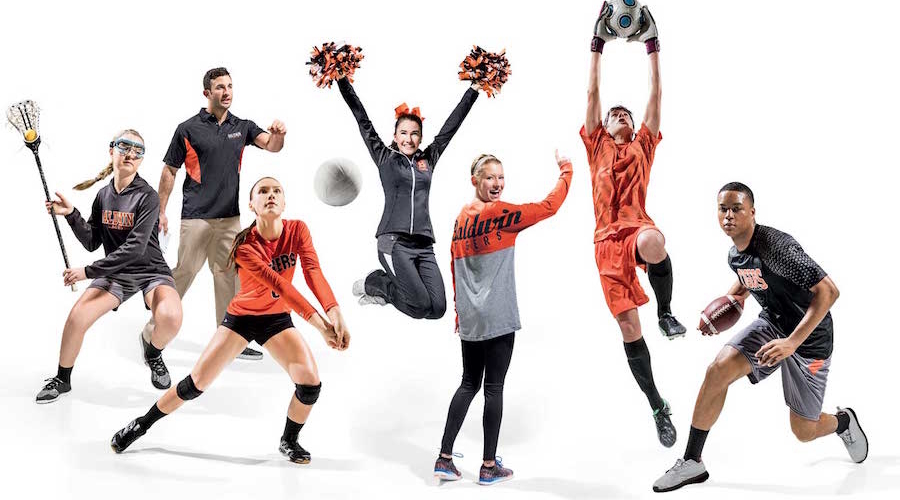


**Problem Statement**

1. Sports wear group has a problem in boosting the next marketing compaign and believes in advanced analytics technique because, it'll aid them to improve the the brand efficiency and sales.

2. advanced analytics technique'll aid them in perfect ways to understand the the relations between its features and how to enhance the sales, segment the appropriate target ones who'll buy actually to decrease the effort,money and time in segmentation randomely.

3. How i'll solve the problem



*   Data understanding to catch some structurs and insights from the data

*   Exploratory Data Analysis (EDA) to be more aware of the data distrbutions and use visualization to apply the univariate, bivariate and multivariate analysis to acheive some goals later on.

*   Data Cleaning, Encoding, Scaling (preprocessing) and feature selection 

*   Model building based on needs and targeting:

   *   Cost Prediction modeling to satisfy the **management team**
   *   Classification modeling on the label of advertisement result to satisfy **marketing team** 

*   Evaluation phase and enhance the modeling




4. The Objective of this Problem is to predict the label and how we can enhance it by getting the relations between label and its related features and estimate the cost also based on its features, so we can satisfy the management team.  Segment the appropriate customers to satisfy marketing team and offer the best product and appropriate discount.








In [1]:
#used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import math as mt


In [2]:
swg_df=pd.read_csv('/content/Rania Atef - full_gen_data.csv')

**Data Understanding**

In [3]:
swg_df #(23 features and 100000 instances)

country article  sales  regular_price  current_price     ratio  \
0      Germany  YN8639     28           5.95           3.95  0.663866   
1      Germany  YN8639     28           5.95           3.95  0.663866   
2      Germany  YN8639     28           5.95           3.95  0.663866   
3      Germany  YN8639     28           5.95           3.95  0.663866   
4      Germany  YN8639     28           5.95           3.95  0.663866   
...        ...     ...    ...            ...            ...       ...   
99995  Germany  PW6278    227          57.95          26.95  0.465056   
99996  Germany  PW6278    227          57.95          26.95  0.465056   
99997  Germany  PW6278    227          57.95          26.95  0.465056   
99998  Germany  PW6278    227          57.95          26.95  0.465056   
99999  Germany  PW6278    227          57.95          26.95  0.465056   

       retailweek  promo1  promo2  customer_id  ...    style  \
0      2016-03-27       0       0       1003.0  ...     slim   
1      2016-03-27       0       0       1003.0  ...  regular   
2      2016-03-27       0       0       1003.0  ...  regular   
3      2016-03-27       0       0       1003.0  ...  regular   
4      2016-03-27       0       0       1003.0  ...  regular   
...           ...     ...     ...          ...  ...      ...   
99995  2016-06-26       0       0       1489.0  ...     wide   
99996  2016-06-26       0       0       1489.0  ...     wide   
99997  2016-06-26       0       0       1489.0  ...     wide   
99998  2016-06-26       0       0       1489.0  ...     slim   
99999  2016-06-26       0       0       1489.0  ...  regular   

                     sizes  gender  rgb_r_main_col rgb_g_main_col  \
0      xxs,xs,s,m,l,xl,xxl   women             205            104   
1      xxs,xs,s,m,l,xl,xxl   women             188            238   
2      xxs,xs,s,m,l,xl,xxl   women             205            173   
3      xxs,xs,s,m,l,xl,xxl    kids             205            140   
4      xxs,xs,s,m,l,xl,xxl   women             138             43   
...                    ...     ...             ...            ...   
99995  xxs,xs,s,m,l,xl,xxl   women              79            148   
99996          xs,s,m,l,xl  unisex             139             26   
99997  xxs,xs,s,m,l,xl,xxl   women             135            206   
99998  xxs,xs,s,m,l,xl,xxl   women             181            181   
99999  xxs,xs,s,m,l,xl,xxl     men             139            137   

      rgb_b_main_col rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  label  
0                 57           255            187            255      0  
1                104           255            187            255      0  
2                  0           255            187            255      0  
3                149           164            211            238      0  
4                226           164            211            238      0  
...              ...           ...            ...            ...    ...  
99995            205           164            211            238      0  
99996             26           205            155            155      0  
99997            250           205            155            155      0  
99998            181           205            155            155      0  
99999            137           205            155            155      0  

[100000 rows x 24 columns]

In [ ]:
swg_df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [ ]:
#type of each feature
swg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [ ]:
#some statistics insighs of the data
swg_df.describe()

sales  regular_price  current_price          ratio  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       56.781800      52.391200      28.290800       0.545646   
std        87.934743      35.272128      22.578343       0.194363   
min         1.000000       3.950000       1.950000       0.296482   
25%        10.000000      25.950000      11.950000       0.354839   
50%        26.000000      40.950000      20.950000       0.525044   
75%        64.000000      79.950000      37.950000       0.699248   
max       898.000000     197.950000     195.950000       1.000000   

              promo1         promo2    customer_id           cost  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.061900       0.004900    2721.726500       6.517000   
std         0.240975       0.069829    1908.085499       3.914728   
min         0.000000       0.000000       1.000000       1.290000   
25%         0.000000       0.000000    1017.000000       2.290000   
50%         0.000000       0.000000    2091.000000       6.950000   
75%         0.000000       0.000000    4570.250000       9.600000   
max         1.000000       1.000000    5999.000000      13.290000   

       rgb_r_main_col  rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col  \
count   100000.000000   100000.000000   100000.000000  100000.000000   
mean       161.400000      139.600000      133.500000     207.700000   
std         39.790147       63.641814       81.148727      35.313205   
min         79.000000       26.000000        0.000000     164.000000   
25%        138.000000      104.000000       57.000000     164.000000   
50%        160.000000      144.000000      143.000000     205.000000   
75%        205.000000      181.000000      205.000000     255.000000   
max        205.000000      238.000000      250.000000     255.000000   

       rgb_g_sec_col  rgb_b_sec_col         label  
count  100000.000000  100000.000000  100000.00000  
mean      181.400000     209.900000       0.13928  
std        23.474359      45.306849       0.34624  
min       155.000000     155.000000       0.00000  
25%       155.000000     155.000000       0.00000  
50%       187.000000     238.000000       0.00000  
75%       211.000000     255.000000       0.00000  
max       211.000000     255.000000       1.00000

In [ ]:
#check duplicated rows
swg_df.duplicated().any()

False

In [ ]:
#check the nulls
swg_df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [ ]:
#take a quick insight from features counts
list_columns=swg_df.columns
print(list_columns)
for column in list_columns:
  dict_counts={}
  dict_counts[column]=dict(swg_df[column].value_counts(dropna=False))
  print(dict_counts)
  


Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')
{'country': {'Germany': 49400, 'Austria': 35140, 'France': 15460}}
{'article': {'BR3179': 610, 'MR4948': 560, 'XG6449': 550, 'AA7884': 540, 'OP1184': 520, 'VS6613': 510, 'QS5396': 510, 'CB4942': 510, 'ST3419': 490, 'ZE9366': 480, 'MA7179': 480, 'XC9518': 480, 'TX1463': 480, 'IR3275': 460, 'BS7795': 460, 'EZ8648': 450, 'MM4542': 450, 'ZU5523': 450, 'YX1723': 440, 'KJ9185': 430, 'HM5731': 430, 'EF6812': 420, 'RF6881': 410, 'AP5568': 410, 'PW6278': 410, 'LH8921': 410, 'DZ3492': 410, 'WF4276': 400, 'TX8432': 400, 'LR5226': 400, 'XH6675': 390, 'JG1582': 390, 'QS1816': 380, 'QO8312': 370, 'GJ5184': 370, 'ZV2187': 370, 'OC6355'

In [ ]:
#a function to check the inconsistent through categorical data

def check_inconsistentity(df):
  for column in (df.select_dtypes(include='object')).columns:
    dict_unique={}
    dict_unique[column]=df[column].unique()
    print(dict_unique)

In [ ]:
check_inconsistentity(swg_df)

{'country': array(['Germany', 'Austria', 'France'], dtype=object)}
{'article': array(['YN8639', 'CF3238', 'WR9459', 'EF2771', 'LX1494', 'VF6733',
       'YK5786', 'CX1431', 'TK4862', 'ZM8792', 'LU3394', 'IW7978',
       'XG3252', 'UM7314', 'XG6449', 'ZJ5718', 'LI3529', 'KO9295',
       'GJ5184', 'UJ4517', 'BU9681', 'CR8478', 'VK4838', 'AA7884',
       'BY9685', 'UX6851', 'FF7283', 'CB8861', 'FE4648', 'BC1489',
       'PQ6953', 'WO1329', 'LH8921', 'TS8795', 'LI6472', 'CA2199',
       'WK5365', 'QS5396', 'TM4166', 'BF7459', 'JY1298', 'MP6772',
       'AZ5221', 'MR4948', 'UD3728', 'VT7698', 'DI9187', 'OZ8992',
       'UB1117', 'TN5256', 'BE9148', 'FU5676', 'ST3419', 'ZK4922',
       'FJ2121', 'KT8964', 'RO5412', 'BS7795', 'QP2819', 'GW8244',
       'AP5568', 'PP8845', 'GC8114', 'MJ2618', 'ZC7213', 'GD2286',
       'RN5619', 'EN9438', 'PZ7731', 'LR5226', 'BM9116', 'LD8468',
       'ML2223', 'NQ1161', 'GT5685', 'QU7755', 'GA4832', 'HM5731',
       'EH5694', 'ZV2187', 'KF6572', 'IR3275', 'MO

In [ ]:
article=swg_df['article'].unique()
article1=swg_df['article.1'].unique()
intersection_ele=[ele for ele in article if ele in article1]
print(intersection_ele)
#column of article.1 elements is considered as a part of column article, so the best deal with article.1 atribute

['LI3529', 'CB8861', 'VT7698', 'AP5568', 'TX1463', 'FG2965', 'AC7347', 'OC6355', 'GG8661', 'PC6383']


In [ ]:
#drop article
swg_df.drop('article', axis=1,inplace=True)
swg_df

country  sales  regular_price  current_price     ratio  retailweek  \
0      Germany     28           5.95           3.95  0.663866  2016-03-27   
1      Germany     28           5.95           3.95  0.663866  2016-03-27   
2      Germany     28           5.95           3.95  0.663866  2016-03-27   
3      Germany     28           5.95           3.95  0.663866  2016-03-27   
4      Germany     28           5.95           3.95  0.663866  2016-03-27   
...        ...    ...            ...            ...       ...         ...   
99995  Germany    227          57.95          26.95  0.465056  2016-06-26   
99996  Germany    227          57.95          26.95  0.465056  2016-06-26   
99997  Germany    227          57.95          26.95  0.465056  2016-06-26   
99998  Germany    227          57.95          26.95  0.465056  2016-06-26   
99999  Germany    227          57.95          26.95  0.465056  2016-06-26   

       promo1  promo2  customer_id article.1  ...    style  \
0           0       0       1003.0    OC6355  ...     slim   
1           0       0       1003.0    AP5568  ...  regular   
2           0       0       1003.0    CB8861  ...  regular   
3           0       0       1003.0    LI3529  ...  regular   
4           0       0       1003.0    GG8661  ...  regular   
...       ...     ...          ...       ...  ...      ...   
99995       0       0       1489.0    TX1463  ...     wide   
99996       0       0       1489.0    PC6383  ...     wide   
99997       0       0       1489.0    VT7698  ...     wide   
99998       0       0       1489.0    FG2965  ...     slim   
99999       0       0       1489.0    AC7347  ...  regular   

                     sizes  gender rgb_r_main_col rgb_g_main_col  \
0      xxs,xs,s,m,l,xl,xxl   women            205            104   
1      xxs,xs,s,m,l,xl,xxl   women            188            238   
2      xxs,xs,s,m,l,xl,xxl   women            205            173   
3      xxs,xs,s,m,l,xl,xxl    kids            205            140   
4      xxs,xs,s,m,l,xl,xxl   women            138             43   
...                    ...     ...            ...            ...   
99995  xxs,xs,s,m,l,xl,xxl   women             79            148   
99996          xs,s,m,l,xl  unisex            139             26   
99997  xxs,xs,s,m,l,xl,xxl   women            135            206   
99998  xxs,xs,s,m,l,xl,xxl   women            181            181   
99999  xxs,xs,s,m,l,xl,xxl     men            139            137   

      rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  label  
0                 57            255            187            255      0  
1                104            255            187            255      0  
2                  0            255            187            255      0  
3                149            164            211            238      0  
4                226            164            211            238      0  
...              ...            ...            ...            ...    ...  
99995            205            164            211            238      0  
99996             26            205            155            155      0  
99997            250            205            155            155      0  
99998            181            205            155            155      0  
99999            137            205            155            155      0  

[100000 rows x 23 columns]

**Exploratory Data Analysis**(EDA)

In [4]:
#from data understanding : retailweek is integer, so let's transform it into date type
# Use series.astype() method to convert integers to datetime format
swg_df['retailweek'] = pd.to_datetime(swg_df['retailweek'].astype(str), format='%Y-%m-%d')
print(swg_df.dtypes)


country                   object
article                   object
sales                      int64
regular_price            float64
current_price            float64
ratio                    float64
retailweek        datetime64[ns]
promo1                     int64
promo2                     int64
customer_id              float64
article.1                 object
productgroup              object
category                  object
cost                     float64
style                     object
sizes                     object
gender                    object
rgb_r_main_col             int64
rgb_g_main_col             int64
rgb_b_main_col             int64
rgb_r_sec_col              int64
rgb_g_sec_col              int64
rgb_b_sec_col              int64
label                      int64
dtype: object


In [ ]:
swg_df['retailweek'].tolist()

[Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2016-03-27 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2015-01-25 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-

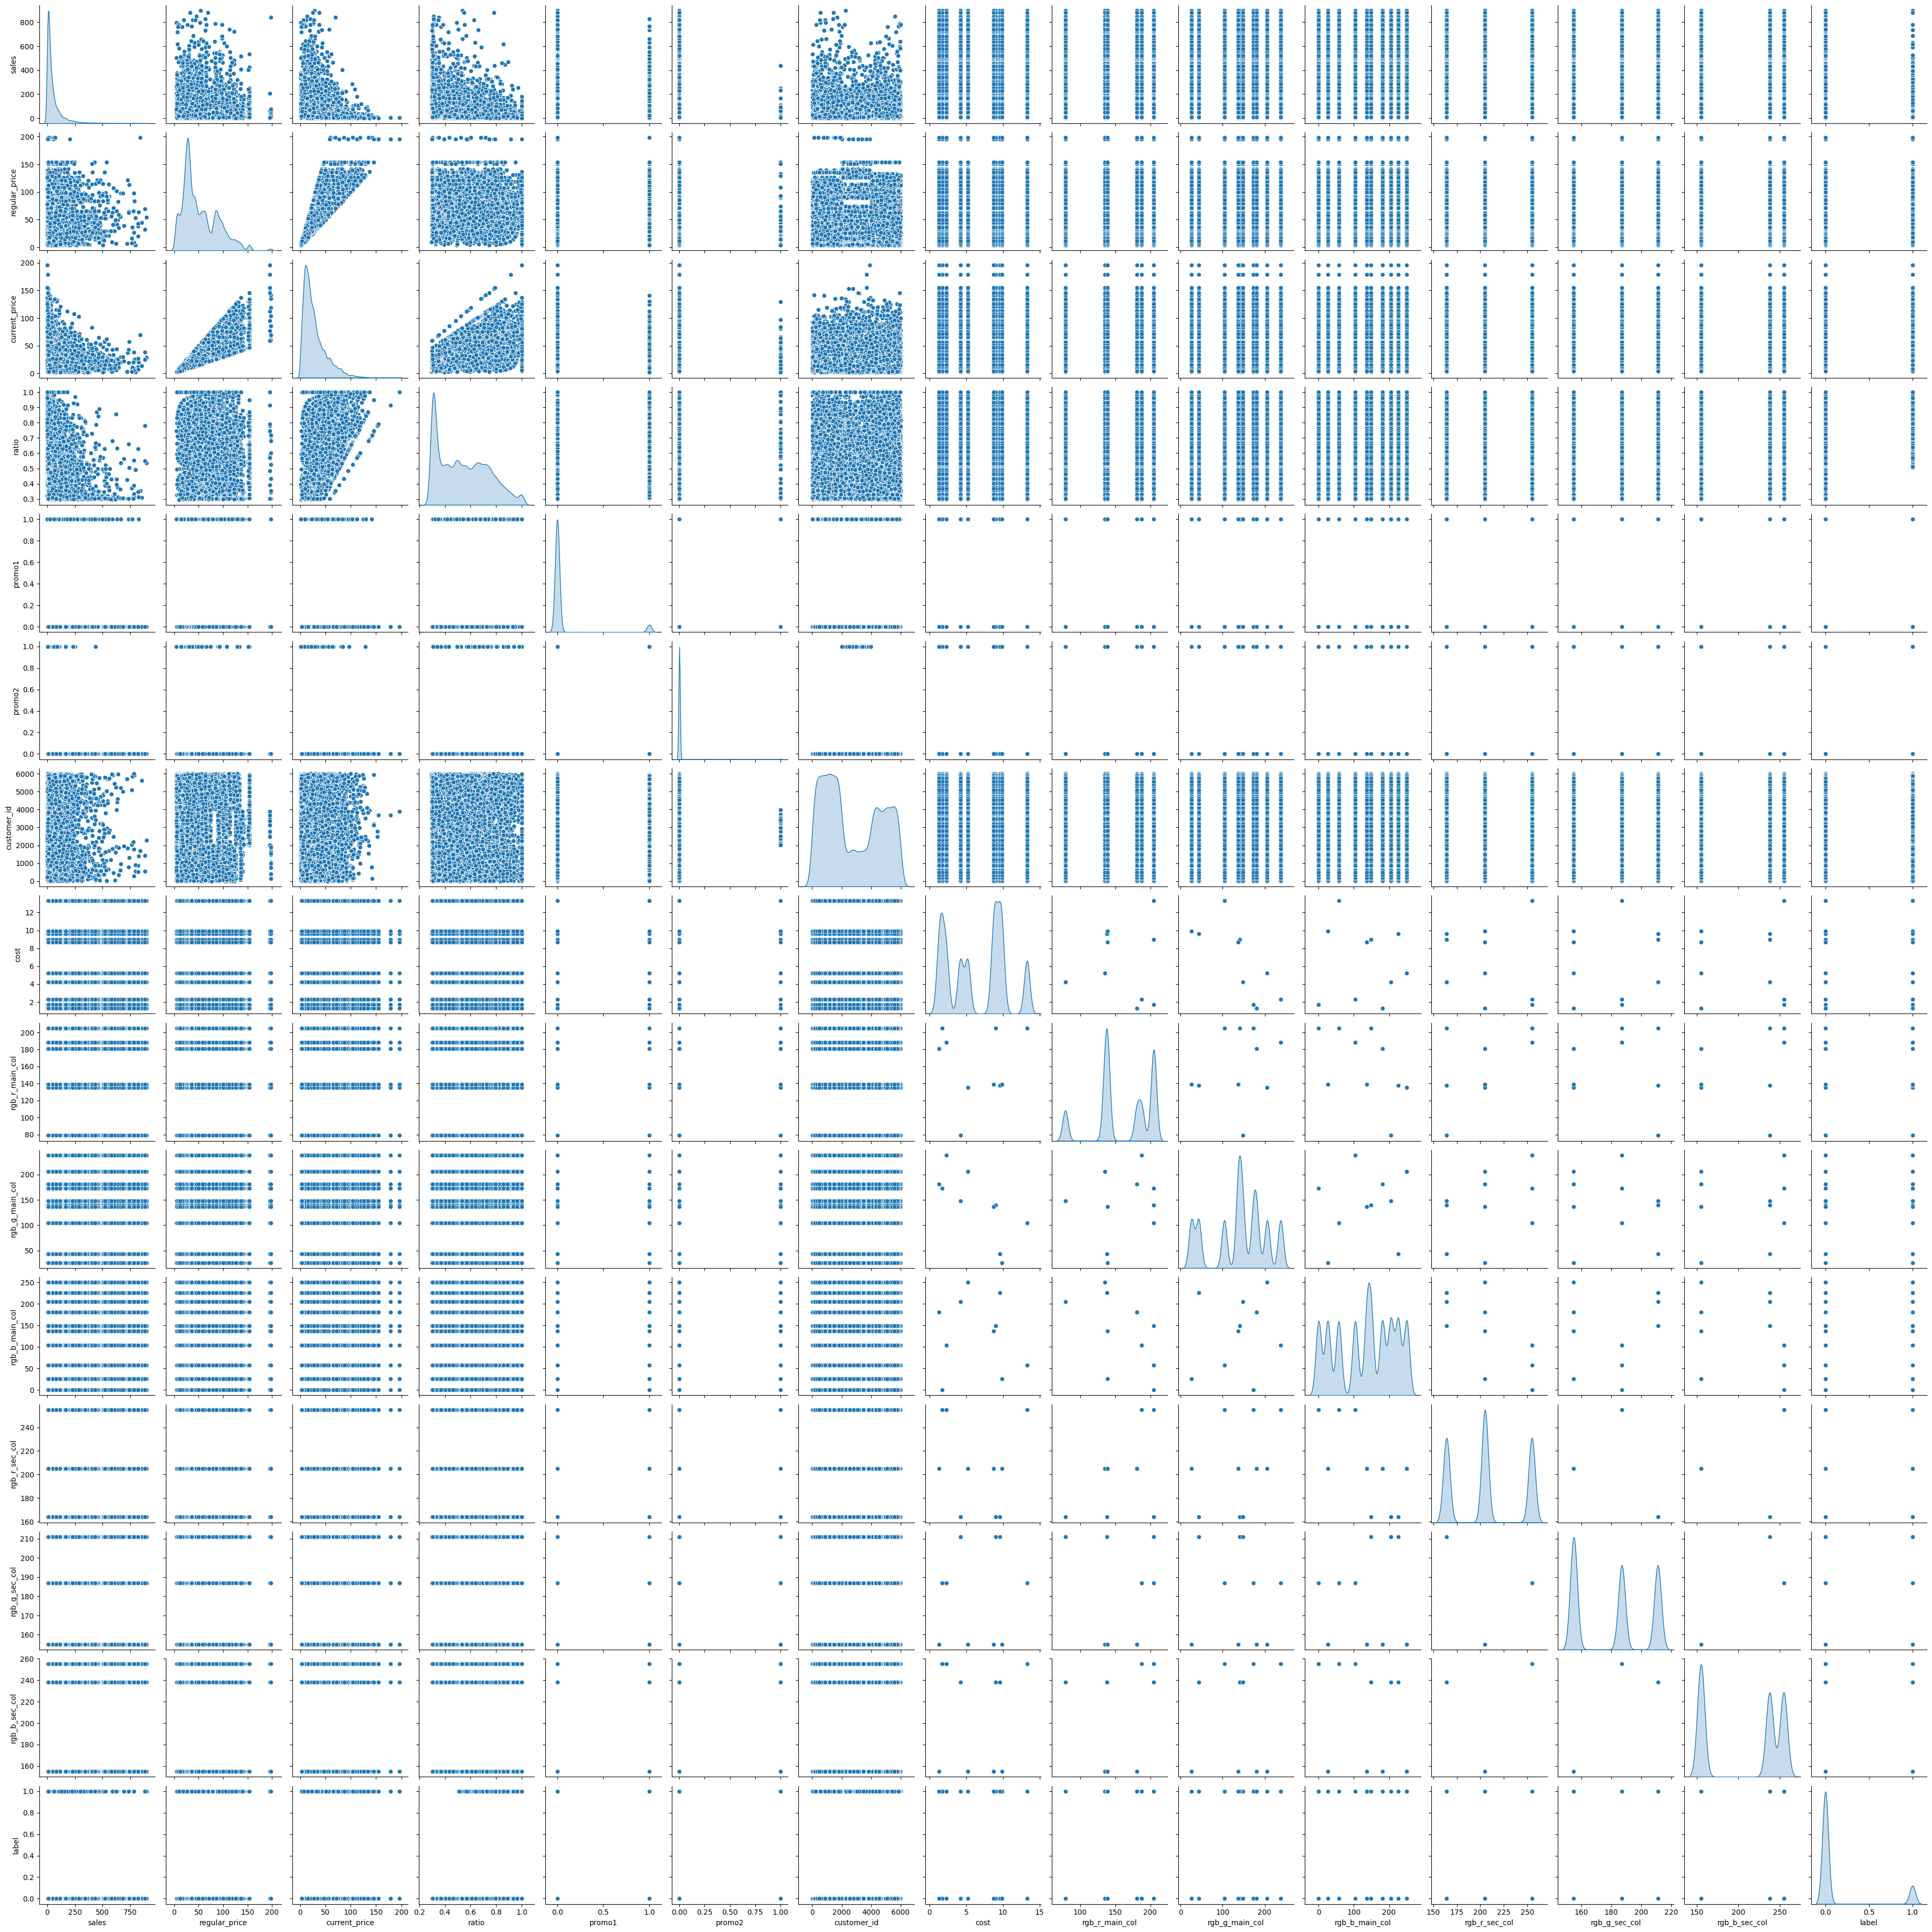

In [ ]:
#quick insights from univariate and bivariate 
sns.pairplot(swg_df, diag_kind='kde')

**Univariate Analysis**(understand each attribute and its distribution and some handling based on these insights)

<Axes: xlabel='country', ylabel='Count'>

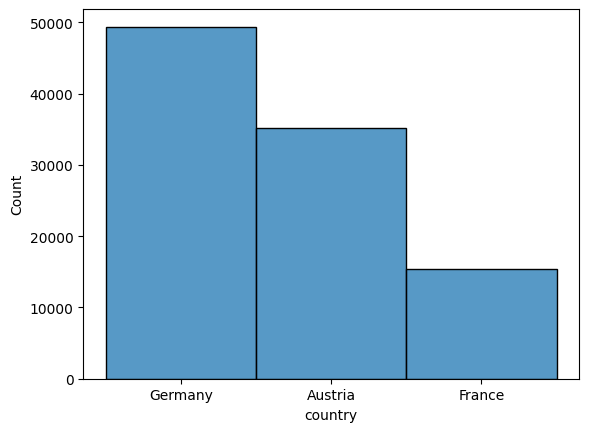

In [3]:

sns.histplot(swg_df['country'])
#most frequent countries is german

<ipython-input-7-8cee967712f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swg_df['sales'])


<Axes: xlabel='sales', ylabel='Density'>

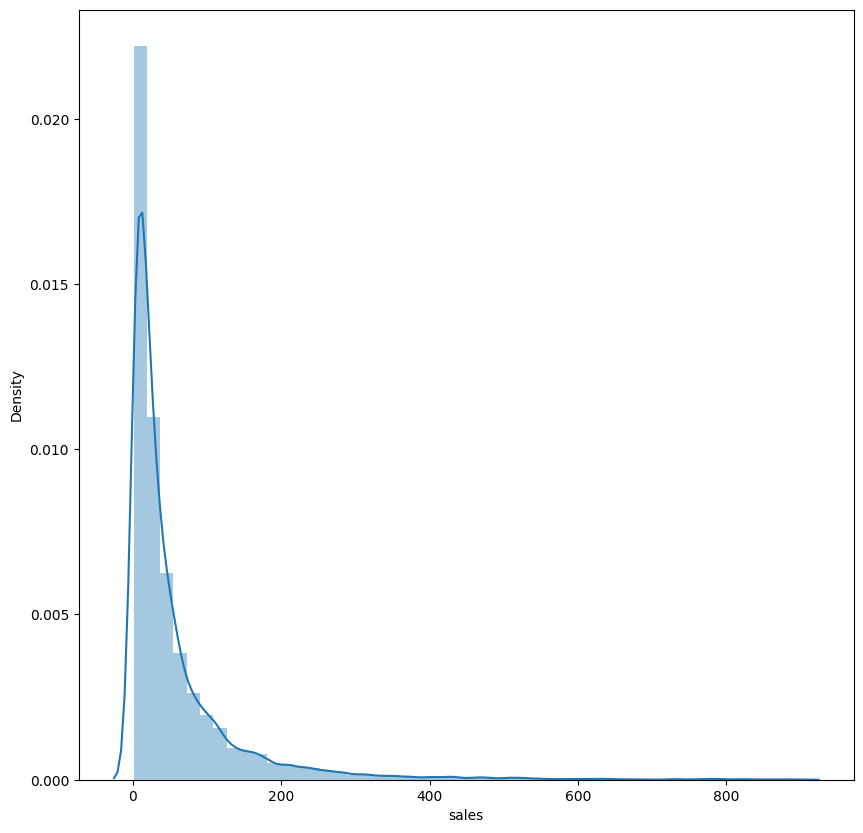

In [ ]:
#distribution of the sales
plt.figure(figsize=(10,10))
sns.distplot(swg_df['sales'])
#most num of units sold less than 200 per a week

<Axes: >

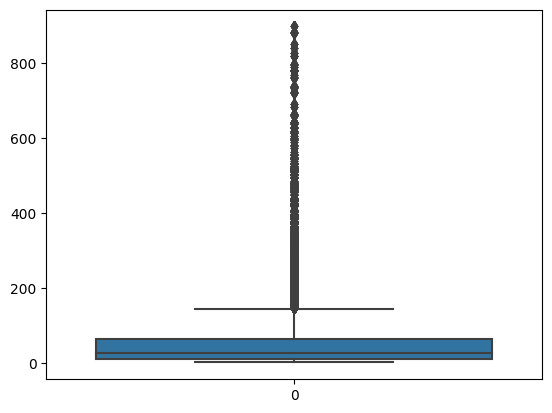

In [ ]:
#check the outliers of sales
sns.boxplot(swg_df['sales'])

#i can't remove outliers in this case so, i should apply transformation
#right skewed .....> use a log , square root

<ipython-input-9-018e8265ef5a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_disst)


<Axes: xlabel='sales', ylabel='Density'>

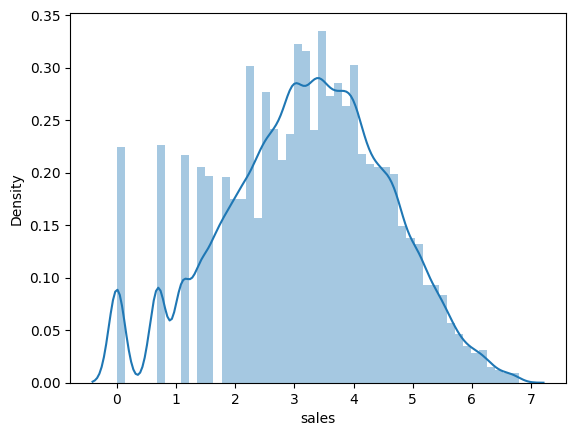

In [ ]:
sales_disst=np.log(swg_df['sales'])
sns.distplot(sales_disst)

<Axes: >

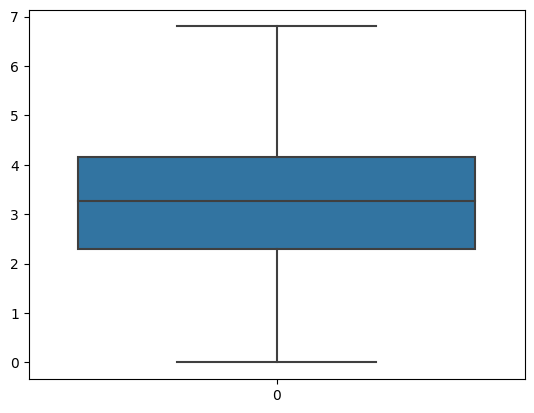

In [ ]:
sns.boxplot(sales_disst)   #ouliers're treated

#apply the log transform on sales after making sure from its distribution improvment later on

<ipython-input-12-5a3141dbf4f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swg_df['current_price'], kde=True)


<Axes: xlabel='current_price', ylabel='Density'>

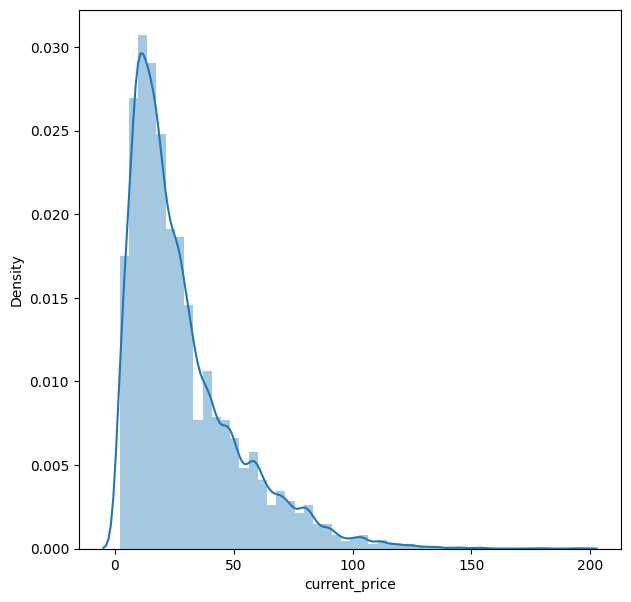

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(swg_df['current_price'], kde=True)            

<Axes: >

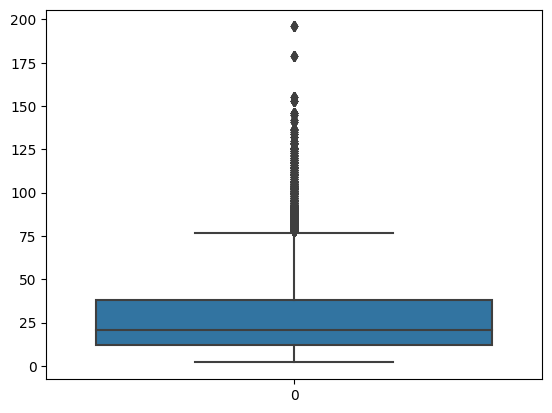

In [ ]:
sns.boxplot(swg_df['current_price'])

<ipython-input-13-4fdeb371da11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swg_df['regular_price'], kde=True)


<Axes: xlabel='regular_price', ylabel='Density'>

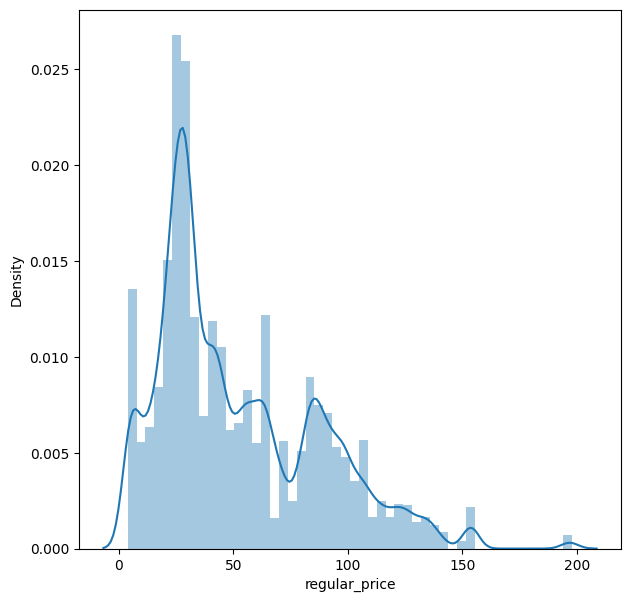

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(swg_df['regular_price'], kde=True)    

<Axes: >

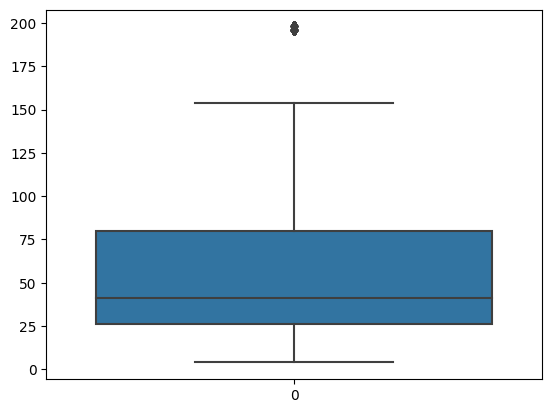

In [ ]:
sns.boxplot(swg_df['regular_price'])

<ipython-input-14-8327ccb820fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swg_df['ratio'], kde=True)     #ratio between current and regular prices has a better distribution


<Axes: xlabel='ratio', ylabel='Density'>

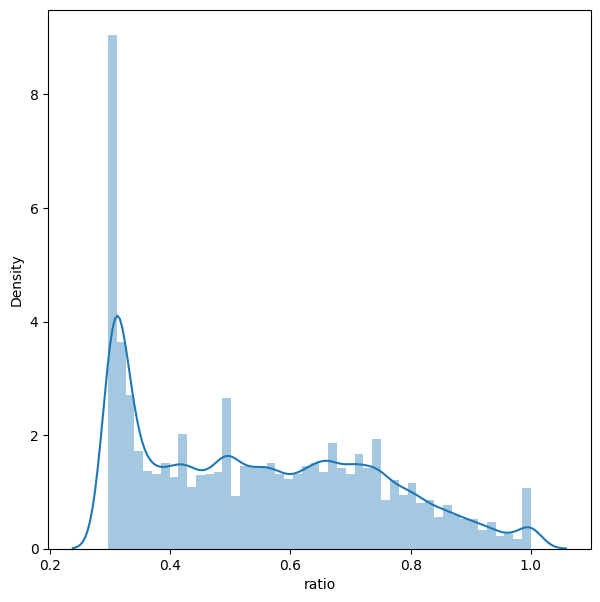

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(swg_df['ratio'], kde=True)     #ratio between current and regular prices has a better distribution 

5678180


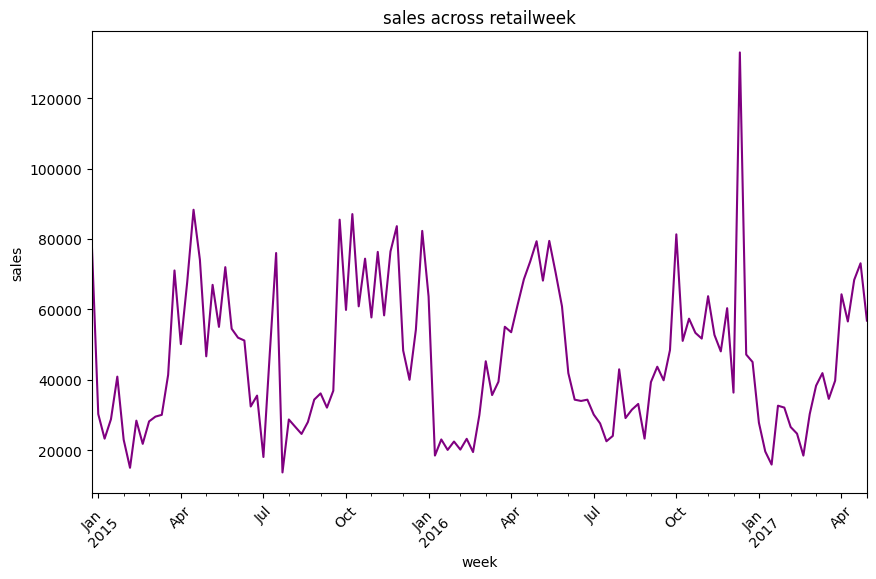

In [6]:
sales_week=swg_df.groupby('retailweek')[['sales']].sum()

#show the distibutions of customers across the different weeks
sales_week.plot( kind='line', rot=45, legend=None, 
        title='sales across retailweek', xlabel='week',ylabel='sales' ,fontsize=10, figsize=(10,6),color='purple')
print(sales_week['sales'].sum())

month
April        856430
August       259290
December     564530
February     280870
January      398810
July         302390
June         315580
March        530130
May          653640
November     577460
October      577110
September    361940
Name: sales, dtype: int64

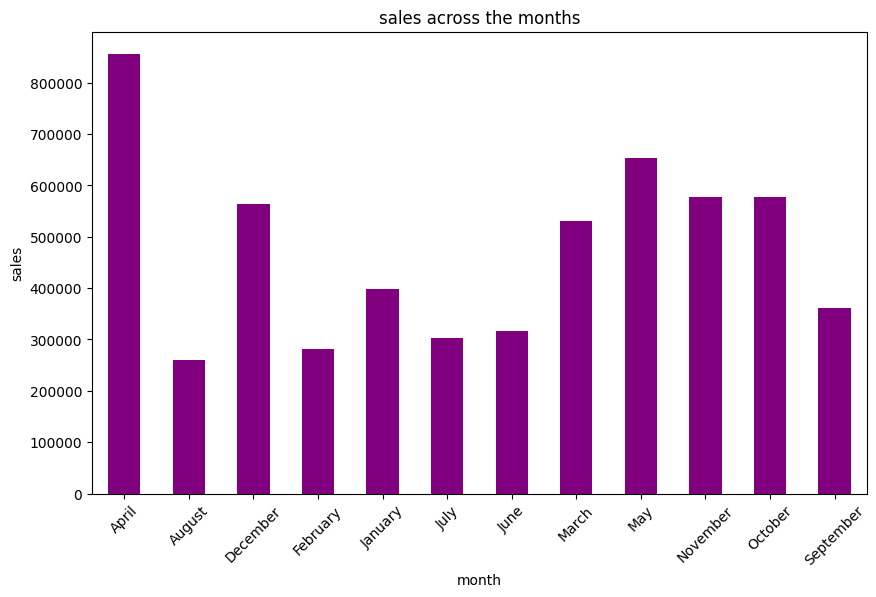

In [7]:
sales_week['month']=sales_week.index.month_name()
sales_week=sales_week.sort_values('month', ascending=True)
total_per_month=sales_week.groupby('month')['sales'].sum()

total_per_month.plot(kind='bar', rot=45, legend=None, 
        title='sales across the months', xlabel='month',ylabel='sales', fontsize=10, figsize=(10,6),color='purple')


total_per_month

In [ ]:
sales_week['day']=sales_week.index.day_name()
sales_week=sales_week.sort_values('day', ascending=True)
total_per_day=sales_week.groupby('day')['sales'].sum()
total_per_day


day
Sunday    320227.232214
Name: sales, dtype: float64

<ipython-input-21-88efc5e8f743>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swg_df['promo1'], kde=False)


0    93810
1     6190
Name: promo1, dtype: int64

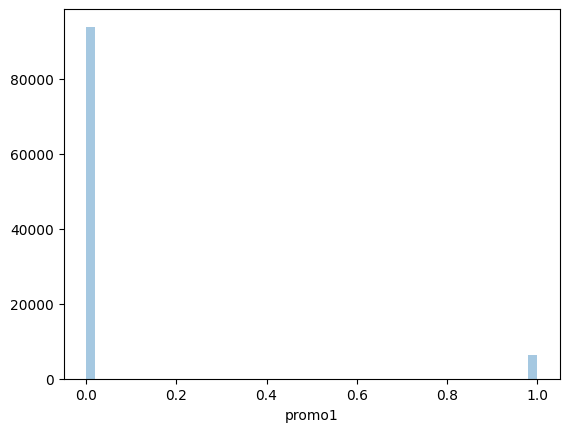

In [ ]:
#promo1
#media advertisment existance per week
sns.distplot(swg_df['promo1'], kde=False)
swg_df['promo1'].value_counts()

In [9]:
promo1_week=swg_df.groupby('retailweek')[['promo1']].sum()


promo1_week[promo1_week['promo1']>0]

promo1
retailweek        
2014-12-28     780
2015-07-12     750
2015-07-19     810
2015-12-20     380
2015-12-27     720
2016-01-03     420
2016-07-31     540
2016-08-07     410
2016-08-14     210
2016-08-21     380
2016-12-11     790

month
April           0
August       1000
December     2670
February        0
January       420
July         2100
June            0
March           0
May             0
November        0
October         0
September       0
Name: promo1, dtype: int64

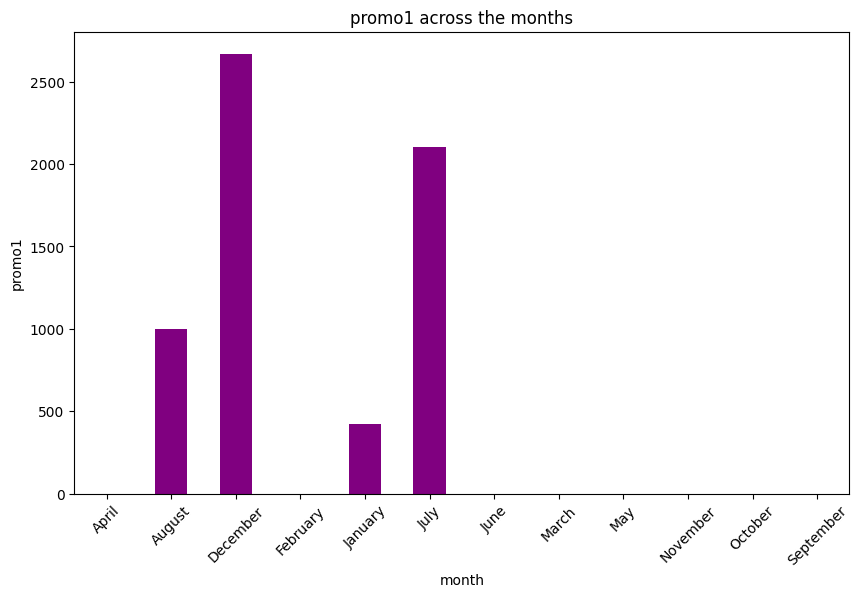

In [10]:
promo1_week['month']=promo1_week.index.month_name()
promo1_week=promo1_week.sort_values('month', ascending=True)
promo1_per_month=promo1_week.groupby('month')['promo1'].sum()

promo1_per_month.plot(kind='bar', rot=45, legend=None, 
        title='promo1 across the months', xlabel='month',ylabel='promo1', fontsize=10, figsize=(10,6),color='purple')

promo1_per_month

In [5]:
promo2_week=swg_df.groupby('retailweek')[['promo2']].sum()


promo2_week[promo2_week['promo2']>0]

promo2
retailweek        
2015-01-25     130
2015-07-12     110
2016-04-24      80
2017-01-01     170

month
April         80
August         0
December       0
February       0
January      300
July         110
June           0
March          0
May            0
November       0
October        0
September      0
Name: promo2, dtype: int64

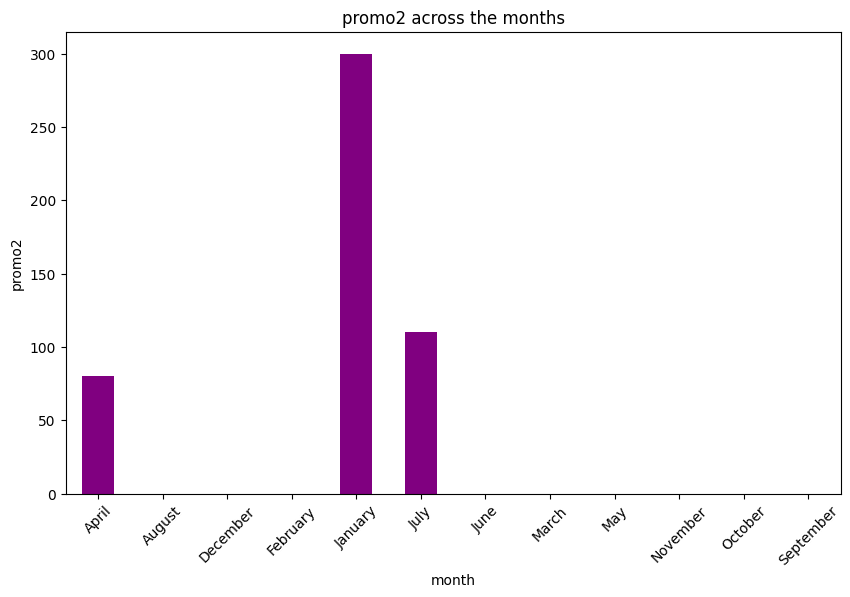

In [7]:
promo2_week['month']=promo2_week.index.month_name()
promo2_week=promo2_week.sort_values('month', ascending=True)
promo2_per_month=promo2_week.groupby('month')['promo2'].sum()

promo2_per_month.plot(kind='bar', rot=45, legend=None, 
        title='promo2 across the months', xlabel='month',ylabel='promo2', fontsize=10, figsize=(10,6),color='purple')

promo2_per_month

0    99510
1      490
Name: promo2, dtype: int64

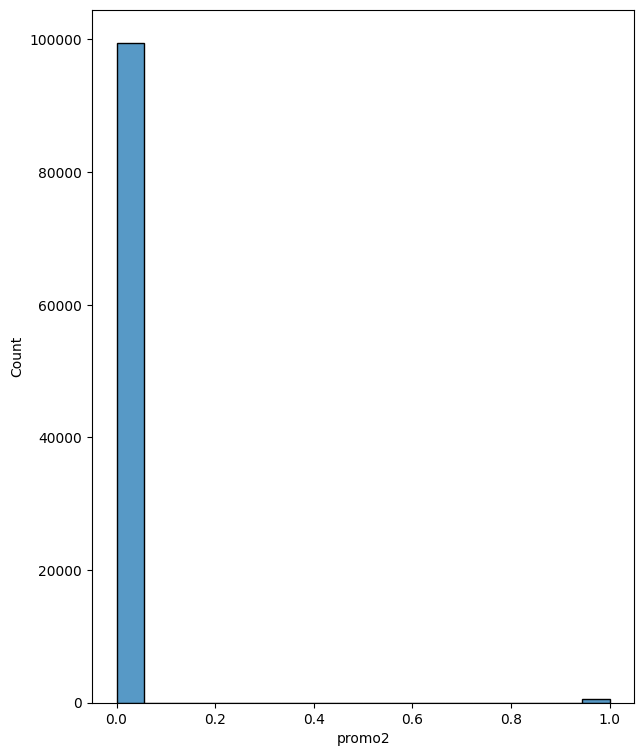

In [ ]:
#promo2 store events existance per each week
plt.figure(figsize=(7,9))
sns.histplot(swg_df['promo2'])
swg_df['promo2'].value_counts()

promo2
retailweek        
2015-01-25     130
2015-07-12     110
2016-04-24      80
2017-01-01     170

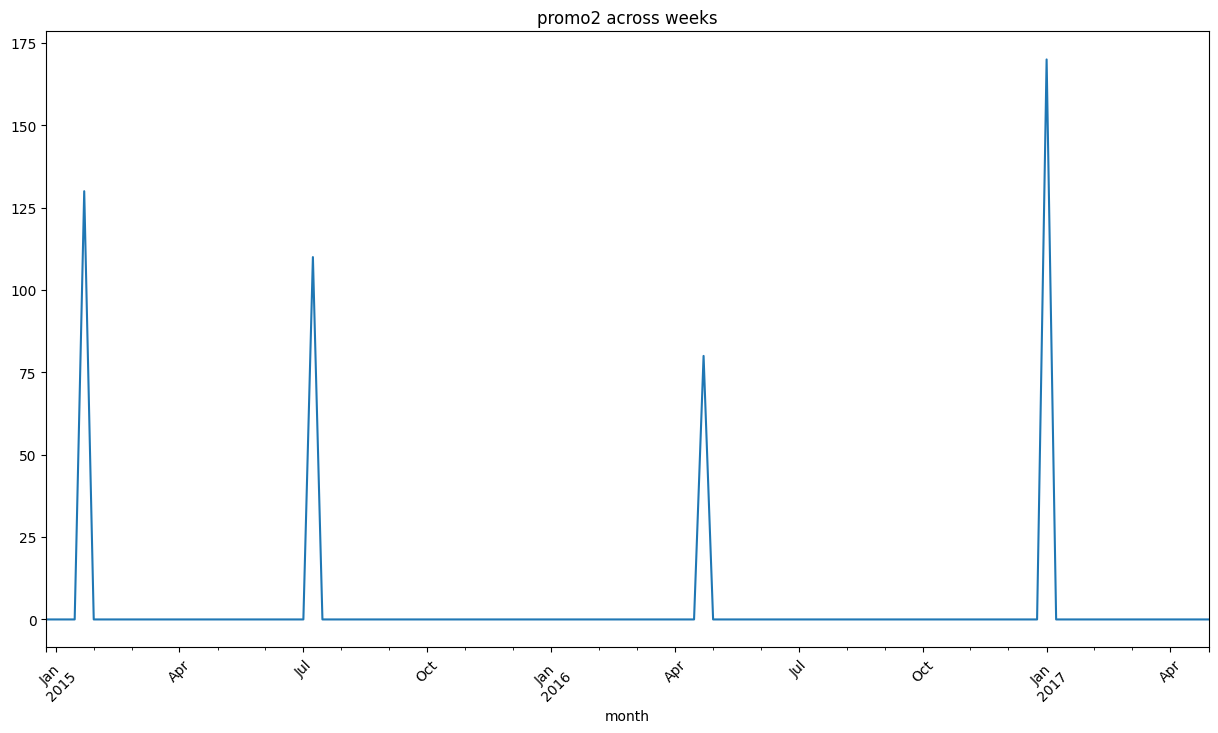

In [9]:

promo2_week=swg_df.groupby('retailweek')[['promo2']].sum()

promo2_week.plot(kind='line', rot=45, legend=None, 
        title='promo2 across weeks', xlabel='month', fontsize=10, figsize=(15,8))
promo2_week[promo2_week['promo2']>0]


SHOES                   60000
HARDWARE ACCESSORIES    20000
SHORTS                  10000
SWEATSHIRTS             10000
Name: productgroup, dtype: int64

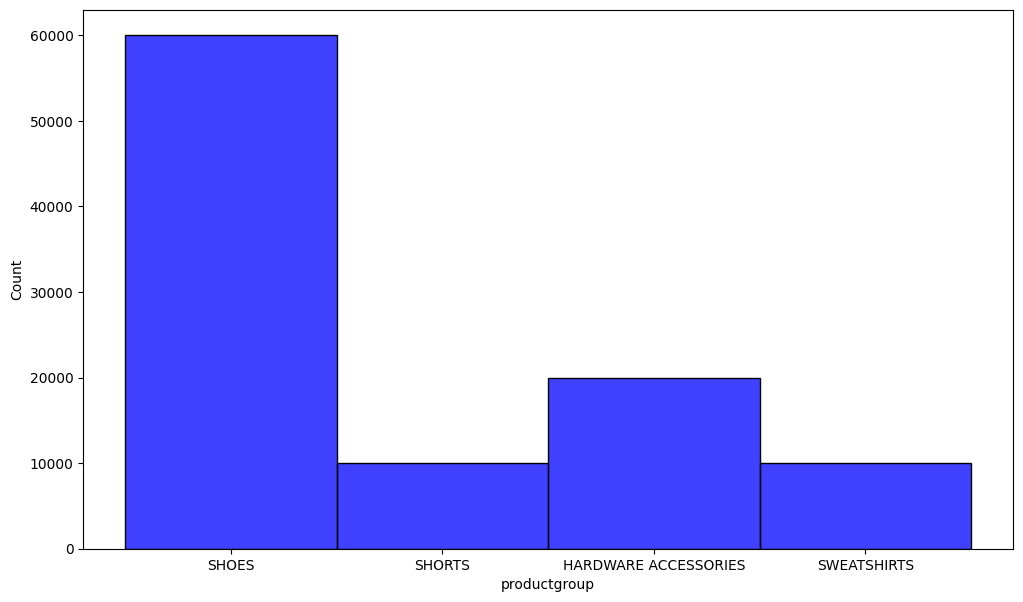

In [ ]:
#product group
plt.figure(figsize=(12,7))
sns.histplot(swg_df['productgroup'], color='blue')

swg_df['productgroup'].value_counts()

TRAINING            30000
RUNNING             20000
FOOTBALL GENERIC    20000
GOLF                10000
RELAX CASUAL        10000
INDOOR              10000
Name: category, dtype: int64

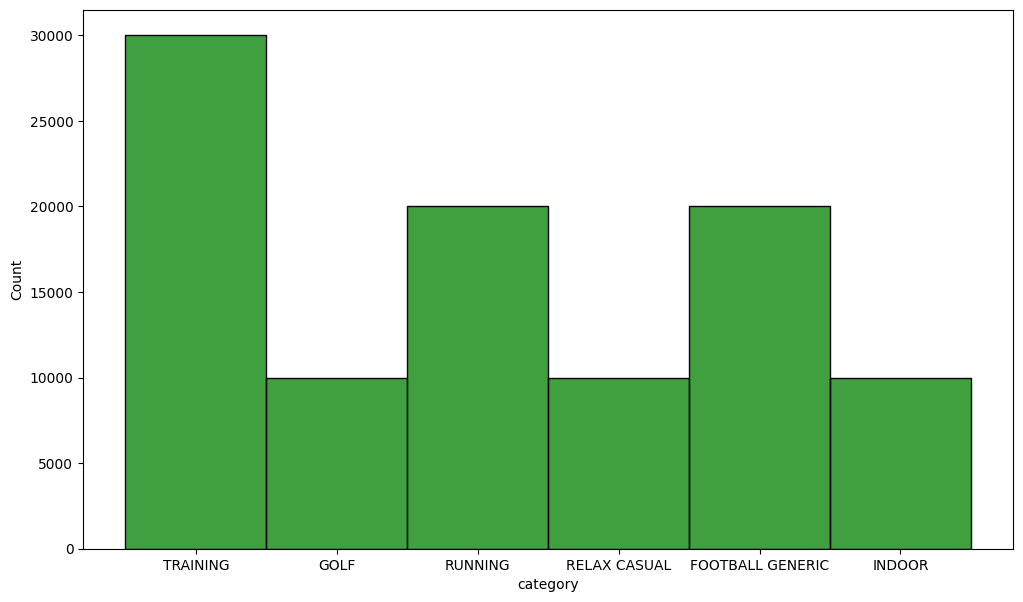

In [ ]:
#product group
plt.figure(figsize=(12,7))
sns.histplot(swg_df['category'], color='green')

swg_df['category'].value_counts()

<ipython-input-30-ed23b6fd464c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swg_df.cost,rug=True,color='blue')   #good distribution (multiple normals)


<Axes: xlabel='cost', ylabel='Density'>

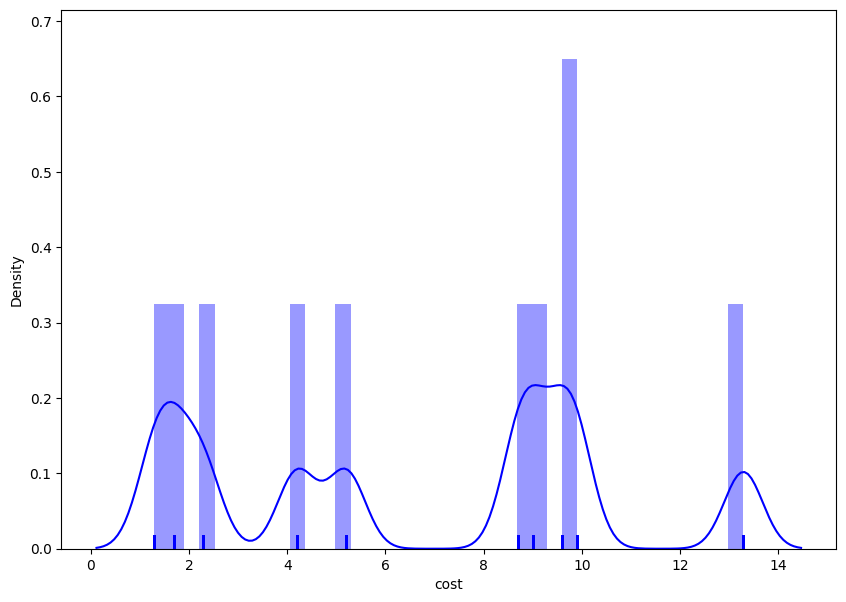

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(swg_df.cost,rug=True,color='blue')   #good distribution (multiple normals)

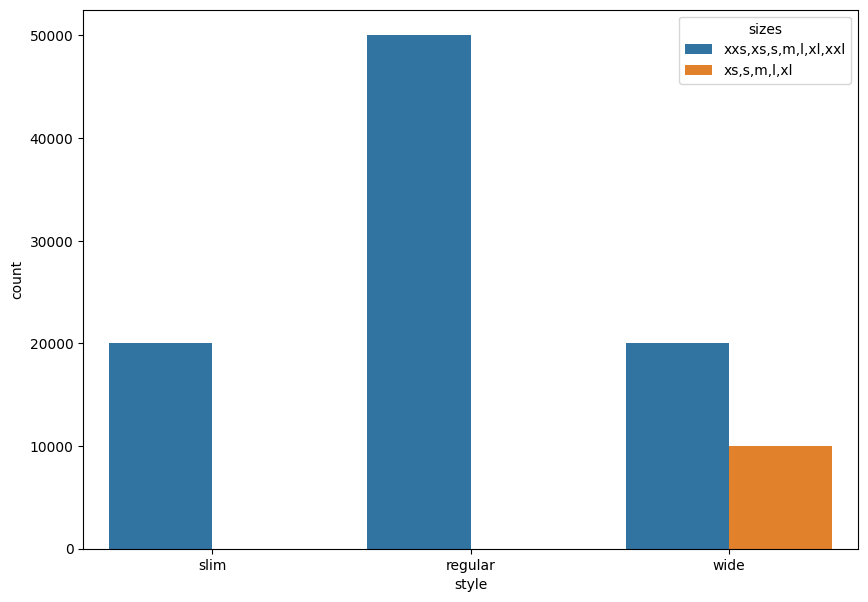

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=swg_df,x='style',hue='sizes')
plt.show()

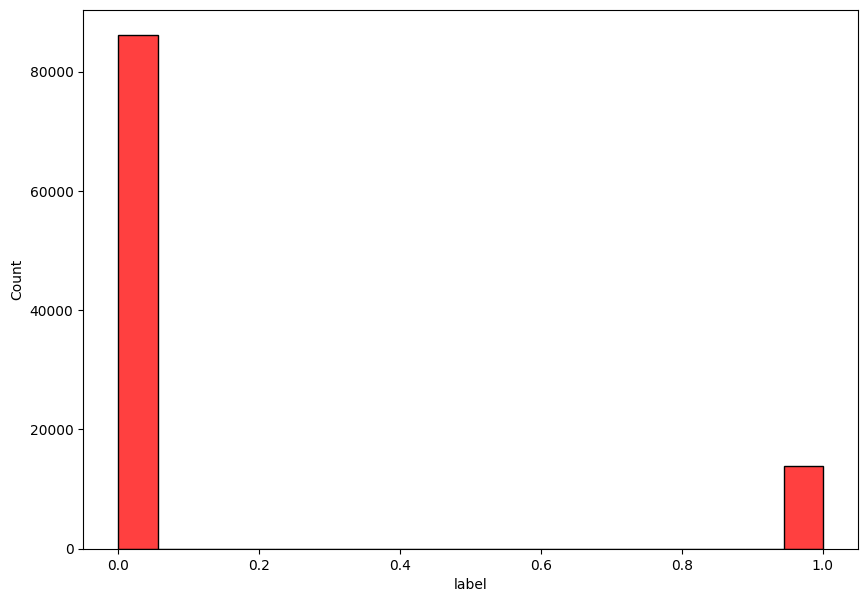

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(swg_df.label, color='red', kde=False)
plt.show()
#imbalanced data

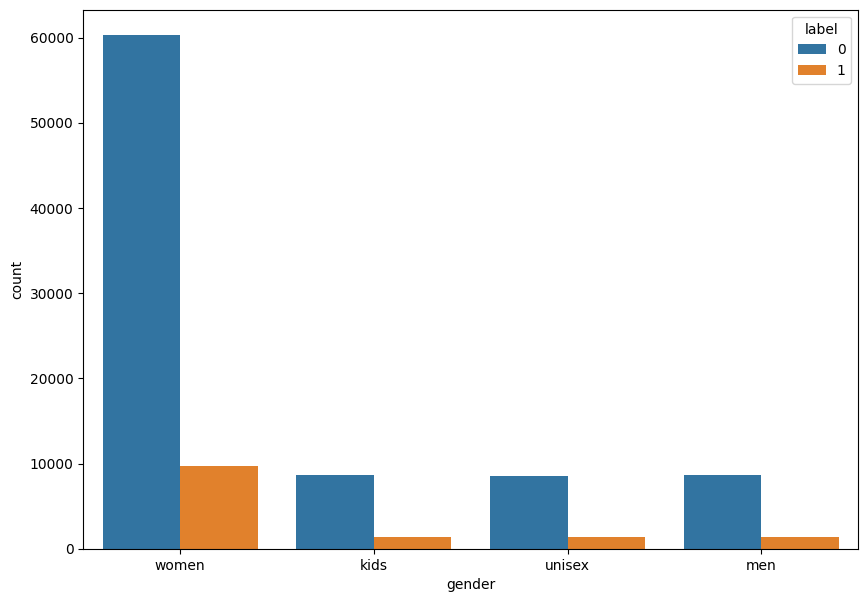

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=swg_df,x='gender', hue='label')
plt.show()


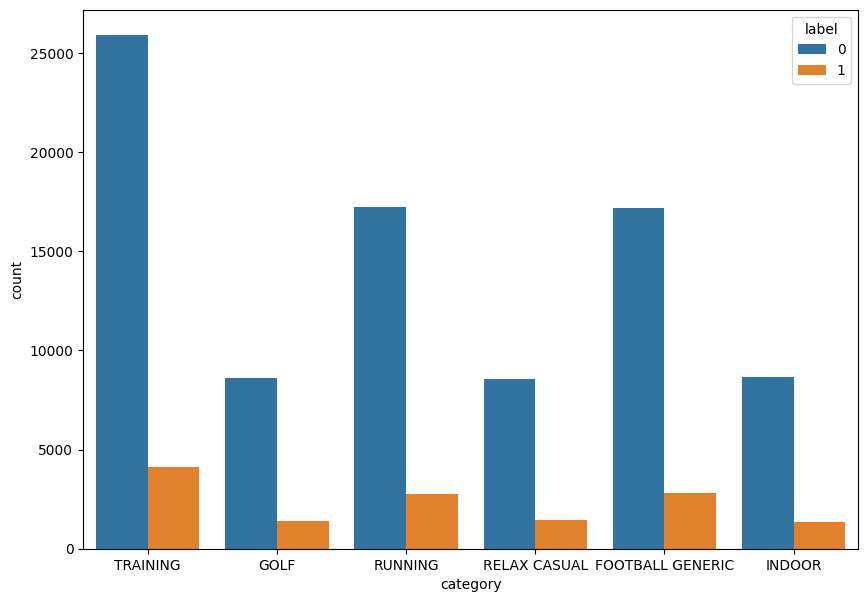

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=swg_df,x='category', hue='label')
plt.show()

**Bivariate & Multivariate Analysis** (understand the relationships between attributes and extract some insights help us in decision making)

<Axes: xlabel='article.1', ylabel='cost'>

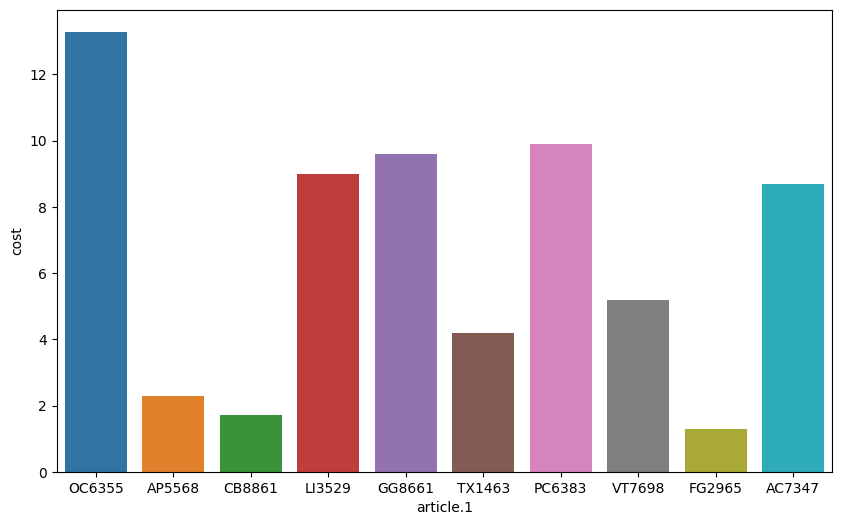

In [8]:
plt.figure(figsize=(10,6))
sns.barplot( x=swg_df['article.1'],y=swg_df['cost'])

In [ ]:
swg_df['category'].value_counts()

TRAINING            30000
RUNNING             20000
FOOTBALL GENERIC    20000
GOLF                10000
RELAX CASUAL        10000
INDOOR              10000
Name: category, dtype: int64

In [ ]:
swg_df['sales'].sum()

5678180

In [ ]:
(swg_df.groupby('category'))['sales'].sum()

category
FOOTBALL GENERIC    1135636
GOLF                 567818
INDOOR               567818
RELAX CASUAL         567818
RUNNING             1135636
TRAINING            1703454
Name: sales, dtype: int64

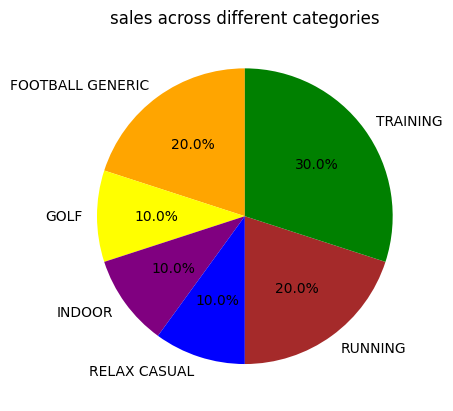

In [ ]:
sizes= [1135636,  567818, 567818, 567818, 1135636,1703454]
labels=['FOOTBALL GENERIC','GOLF','INDOOR','RELAX CASUAL','RUNNING','TRAINING']
colors=['orange','yellow','purple','blue','brown','green']


plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)

plt.title('sales across different categories')
plt.show()

In [ ]:
(swg_df.groupby('productgroup'))['sales'].sum()

productgroup
HARDWARE ACCESSORIES     64045.446443
SHOES                   192136.339328
SHORTS                   32022.723221
SWEATSHIRTS              32022.723221
Name: sales, dtype: float64

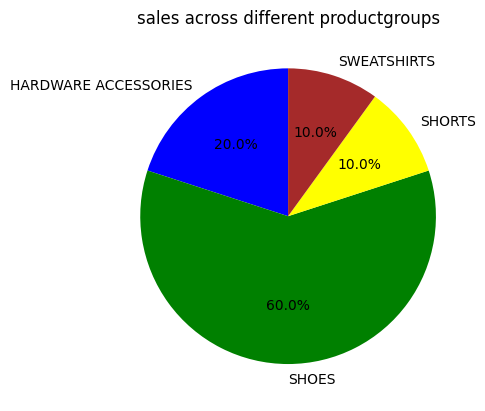

In [ ]:
numbers=[ '64045.446443','192136.339328','32022.723221','32022.723221']
labellls=['HARDWARE ACCESSORIES','SHOES','SHORTS','SWEATSHIRTS']
colorrs=['blue','green','yellow','brown']

plt.pie(numbers,labels=labellls,colors=colorrs,autopct='%1.1f%%',startangle=90)

plt.title('sales across different productgroups')
plt.show()

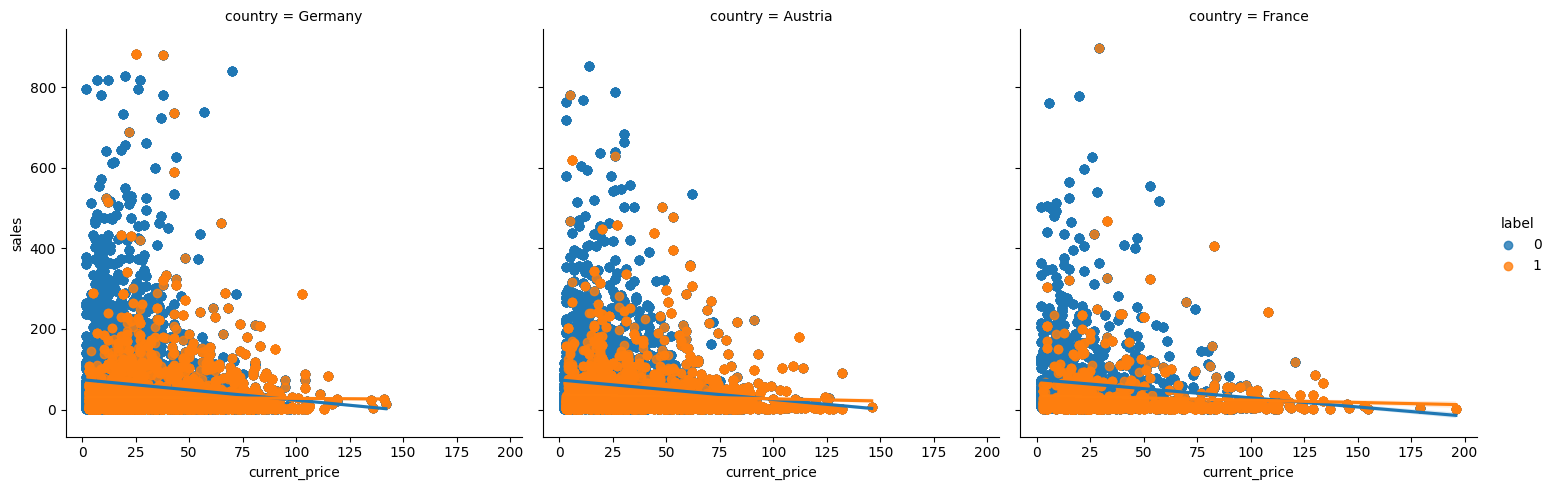

In [ ]:
sns.lmplot(data=swg_df, x='current_price', y='sales', col='country',hue='label')
plt.show()

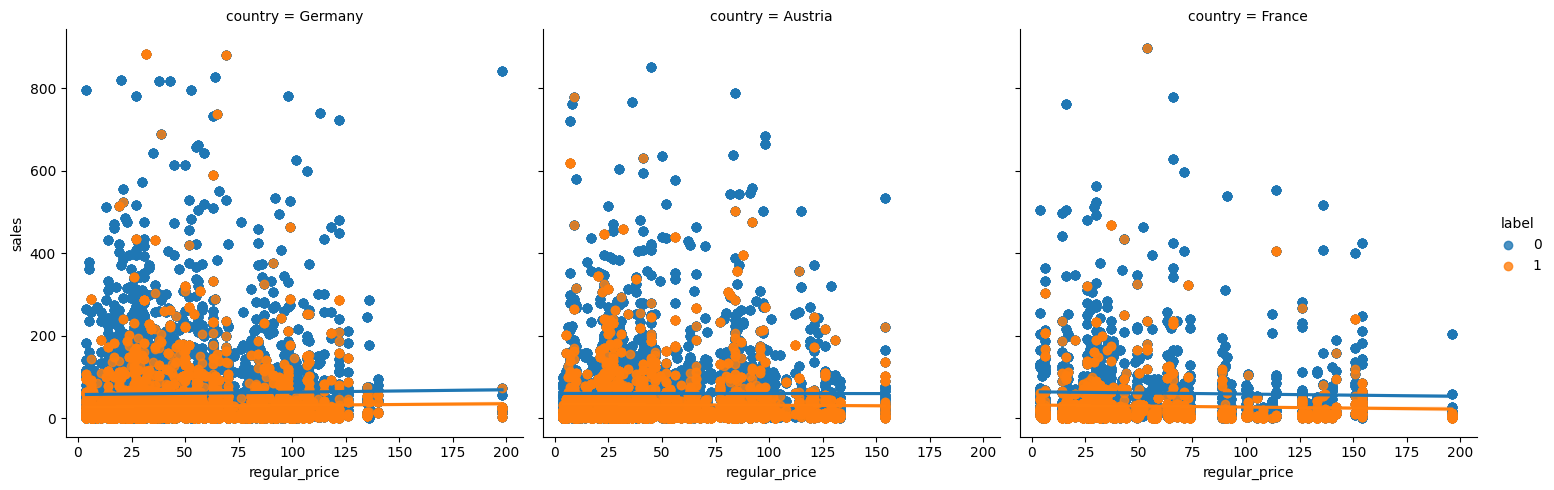

In [ ]:

sns.lmplot(data=swg_df, x='regular_price', y='sales', col='country',hue='label')
plt.show()

In [ ]:
swg_df['sales']

0         28
1         28
2         28
3         28
4         28
        ... 
99995    227
99996    227
99997    227
99998    227
99999    227
Name: sales, Length: 100000, dtype: int64

Some statistics to get some insights

In [ ]:
contingency_table_country_label = pd.crosstab(swg_df['country'], swg_df['label'])
print(contingency_table_country_label)

label        0     1
country             
Austria  30096  5044
France   13413  2047
Germany  42563  6837


In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_country_label)
# Print results
print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

"""
 Based on the results, the chi-square statistic is 11.7 and the p-value is 0.0028,
 which is lower than the significance level of 0.05. 
 Therefore, we reject the null hypothesis and conclude that there is significant association between country and Label.

"""

Chi-square statistic: 11.731614248787466
P-value: 0.002834734138820402
Degrees of freedom: 2
Expected frequencies: [[30245.7008  4894.2992]
 [13306.7312  2153.2688]
 [42519.568   6880.432 ]]


'\n Based on the results, the chi-square statistic is 11.7 and the p-value is 0.0028,\n which is lower than the significance level of 0.05. \n Therefore, we reject the null hypothesis and conclude that there is significant association between country and Label.\n\n'

In [ ]:
contingency_table_promo1_label = pd.crosstab(swg_df['promo1'], swg_df['label'])
print(contingency_table_promo1_label)

label       0      1
promo1              
0       81279  12531
1        4793   1397


In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_promo1_label)
# Print results
print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

"""

 Based on the results, the chi-square statistic is 1.8 and the p-value is 3.3e-91,
 which is lower than the significance level of 0.05. 
 Therefore, we fail reject the null hypothesis and conclude that there is significant association between promo1 and Label.

"""


Chi-square statistic: 410.1778867202113
P-value: 3.3527804906472835e-91
Degrees of freedom: 1
Expected frequencies: [[80744.1432 13065.8568]
 [ 5327.8568   862.1432]]


'\n\n Based on the results, the chi-square statistic is 1.8 and the p-value is 3.3e-91,\n which is lower than the significance level of 0.05. \n Therefore, we fail reject the null hypothesis and conclude that there is significant association between promo1 and Label.\n\n'

In [ ]:
from scipy.stats import ttest_ind
# Separate sales data by gender
promo1_exist_sales = swg_df[swg_df['promo1'] == 1]['sales']
promo1_nonexist_sales = swg_df[swg_df['promo1'] == 0]['sales']

# Perform t-test
t_statistic, p_value = ttest_ind(promo1_exist_sales,promo1_nonexist_sales,equal_var=False)

# Print results

print('P-Value:', p_value)


"""
p-vale<0.05 ,so there's siginificant difference between the mean sales of promo1 and non exist of advertisment

"""


P-Value: 3.386633705146818e-142


"\np-vale<0.05 ,so there's siginificant difference between the mean sales of promo1 and non exist of advertisment\n\n"

In [ ]:
from scipy.stats import ttest_ind
# Separate sales data by gender
promo2_exist_sales = swg_df[swg_df['promo2'] == 1]['sales']
promo2_nonexist_sales = swg_df[swg_df['promo2'] == 0]['sales']

# Perform t-test
t_statistic, pp_value = ttest_ind(promo2_exist_sales,promo2_nonexist_sales,equal_var=False)

# Print results

print('P-Value:', pp_value)

"""
p-value>0.05 ,so there isn't significant difference between the mean sales of promo1 and non exist of advertisment
"""


P-Value: 0.4001928225681074


"\np-value>0.05 ,so there isn't significant difference between the mean sales of promo1 and non exist of advertisment\n"

In [ ]:
swg_df.drop(['customer_id'], axis=1).corr()

sales  regular_price  current_price         ratio  \
sales           1.000000e+00   5.175875e-03  -1.205093e-01 -2.704180e-01   
regular_price   5.175875e-03   1.000000e+00   8.409200e-01 -4.321212e-02   
current_price  -1.205093e-01   8.409200e-01   1.000000e+00  4.127533e-01   
ratio          -2.704180e-01  -4.321212e-02   4.127533e-01  1.000000e+00   
promo1          1.148382e-01  -3.695493e-03   5.966158e-02  1.443172e-01   
promo2         -2.480468e-03   1.314716e-03   1.657370e-02  3.511546e-02   
cost           -2.929382e-18   1.229574e-17   2.726772e-18 -2.851908e-18   
rgb_r_main_col  4.545262e-16  -2.581730e-16  -2.705198e-16 -2.743519e-16   
rgb_g_main_col  7.730616e-17   1.878813e-17   1.084192e-16 -5.070546e-17   
rgb_b_main_col  1.097346e-16  -6.454673e-17  -1.106159e-16 -9.958338e-17   
rgb_r_sec_col   1.766546e-16  -3.200812e-16  -5.544430e-16 -3.624401e-16   
rgb_g_sec_col   4.656323e-17  -2.215911e-16  -4.156394e-16  1.103201e-16   
rgb_b_sec_col   1.916328e-16  -6.570035e-17  -8.639914e-17 -2.094732e-16   
label          -1.166505e-01  -1.502725e-02   1.834016e-01  4.471220e-01   

                      promo1        promo2          cost  rgb_r_main_col  \
sales           1.148382e-01 -2.480468e-03 -2.929382e-18    4.545262e-16   
regular_price  -3.695493e-03  1.314716e-03  1.229574e-17   -2.581730e-16   
current_price   5.966158e-02  1.657370e-02  2.726772e-18   -2.705198e-16   
ratio           1.443172e-01  3.511546e-02 -2.851908e-18   -2.743519e-16   
promo1          1.000000e+00  4.734652e-02 -1.507672e-17    1.448207e-16   
promo2          4.734652e-02  1.000000e+00  8.109669e-18   -5.923813e-16   
cost           -1.507672e-17  8.109669e-18  1.000000e+00    4.829037e-03   
rgb_r_main_col  1.448207e-16 -5.923813e-16  4.829037e-03    1.000000e+00   
rgb_g_main_col  9.497750e-17 -2.043189e-16 -7.337551e-01    2.278015e-01   
rgb_b_main_col -2.577039e-17 -1.718655e-16 -1.102127e-01   -5.307091e-01   
rgb_r_sec_col   5.113318e-18 -2.060884e-16 -1.785002e-01    5.864479e-01   
rgb_g_sec_col  -7.841475e-16  2.577079e-16  1.189099e-01    1.695861e-02   
rgb_b_sec_col   2.292994e-16 -3.401877e-16  2.400004e-02    3.448846e-01   
label           6.410506e-02  2.016475e-02  2.130214e-03   -1.327738e-03   

                rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  \
sales             7.730616e-17    1.097346e-16   1.766546e-16   4.656323e-17   
regular_price     1.878813e-17   -6.454673e-17  -3.200812e-16  -2.215911e-16   
current_price     1.084192e-16   -1.106159e-16  -5.544430e-16  -4.156394e-16   
ratio            -5.070546e-17   -9.958338e-17  -3.624401e-16   1.103201e-16   
promo1            9.497750e-17   -2.577039e-17   5.113318e-18  -7.841475e-16   
promo2           -2.043189e-16   -1.718655e-16  -2.060884e-16   2.577079e-16   
cost             -7.337551e-01   -1.102127e-01  -1.785002e-01   1.189099e-01   
rgb_r_main_col    2.278015e-01   -5.307091e-01   5.864479e-01   1.695861e-02   
rgb_g_main_col    1.000000e+00    1.730695e-01   3.742056e-01  -1.230575e-01   
rgb_b_main_col    1.730695e-01    1.000000e+00  -6.747120e-01   1.253612e-01   
rgb_r_sec_col     3.742056e-01   -6.747120e-01   1.000000e+00  -3.378746e-01   
rgb_g_sec_col    -1.230575e-01    1.253612e-01  -3.378746e-01   1.000000e+00   
rgb_b_sec_col     8.089808e-02   -2.461951e-01   2.068049e-01   8.509705e-01   
label            -7.542409e-03   -1.214023e-03  -2.999657e-03   2.535531e-03   

                rgb_b_sec_col     label  
sales            1.916328e-16 -0.116651  
regular_price   -6.570035e-17 -0.015027  
current_price   -8.639914e-17  0.183402  
ratio           -2.094732e-16  0.447122  
promo1           2.292994e-16  0.064105  
promo2          -3.401877e-16  0.020165  
cost             2.400004e-02  0.002130  
rgb_r_main_col   3.448846e-01 -0.001328  
rgb_g_main_col   8.089808e-02 -0.007542  
rgb_b_main_col  -2.461951e-01 -0.001214  
rgb_r_sec_col    2.068049e-01 -0.003000  
rgb_g_sec_col    8.509705e-01  0.002

<Axes: >

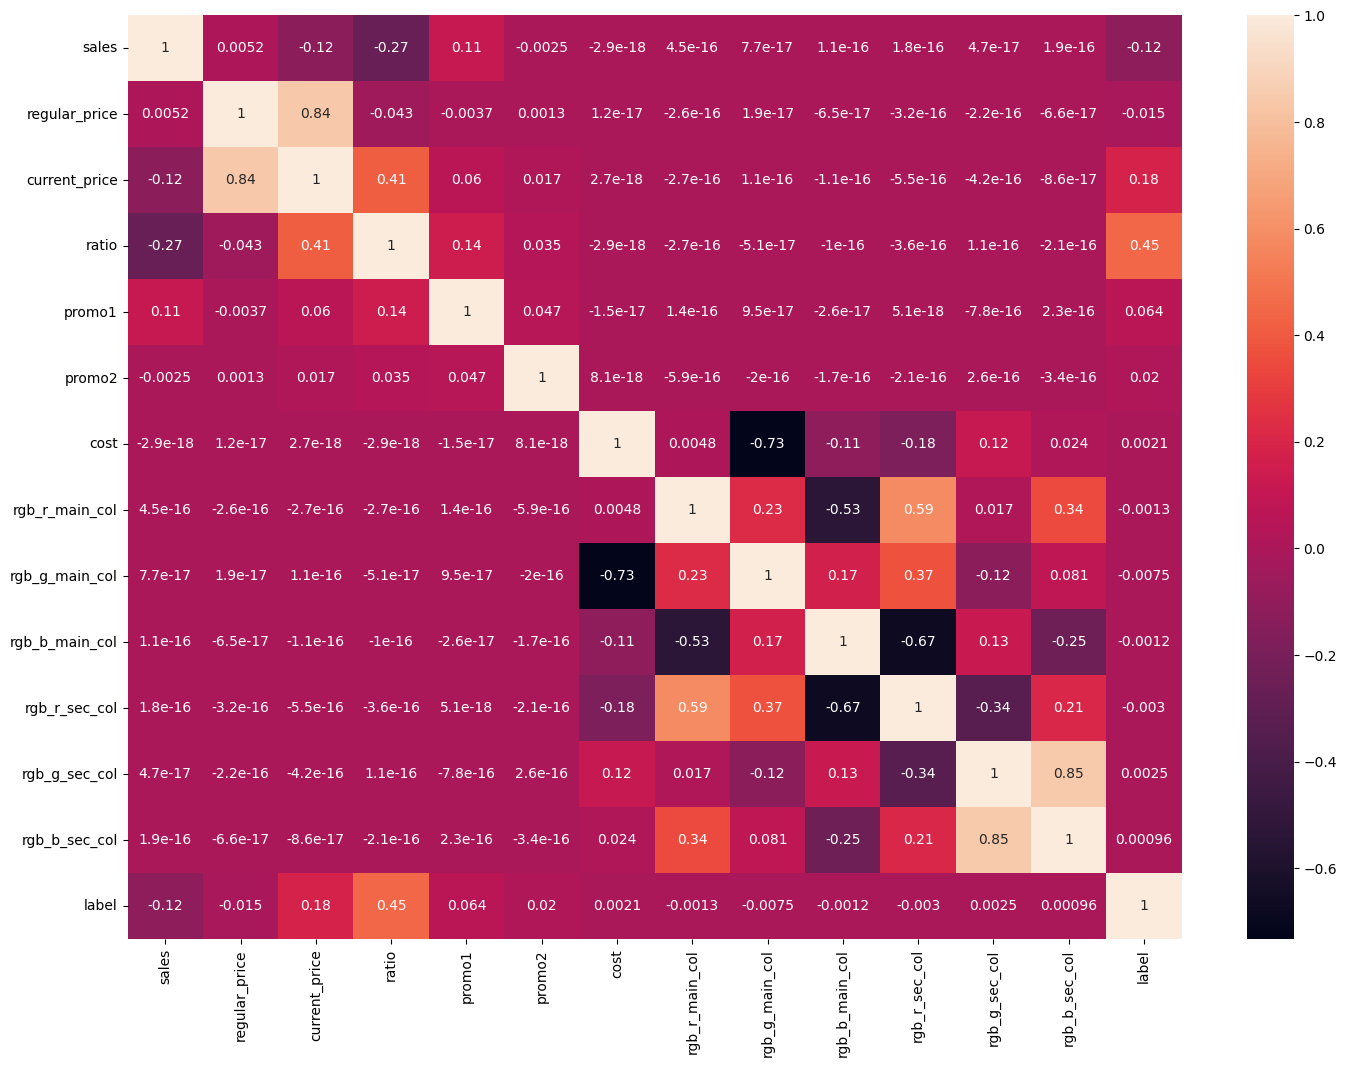

In [ ]:
plt.figure(figsize=(17, 12))
sns.heatmap( swg_df.drop('customer_id', axis=1).corr(),annot=True)

Customer segmentation to satistify marketing team and it's a useful technique that involves dividing customers into groips based on their characteristics and behavior, and can help better understand the business and target their customer to increase satisfaction, loyalty and revenue.

i'll apply **RFM Segmentation** to target special offer and **Behavioral** to satisfy specially, marketing team


In [10]:
import datetime as dt

# Calculate recency, frequency, and monetary value for each customer
snapshot_date = swg_df['retailweek'].max() + dt.timedelta(days=1)
data_rfm = swg_df.groupby(['customer_id']).agg({
    'retailweek': lambda x: (snapshot_date - x.max()).days,
    'sales': 'sum',
    'customer_id': 'count'
})

# Rename columns
data_rfm.rename(columns = {'retailweek': 'recency',
                            'sales': 'monetary_value',
                            'customer_id': 'frequency'},inplace=True)
data_rfm.reindex(swg_df['customer_id'])
# Create RFM score for each customer
quantiles = data_rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def r_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def fm_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

data_rfm['r_quartile'] = data_rfm['recency'].apply(r_score, args=('recency',quantiles,))
data_rfm['f_quartile'] = data_rfm['frequency'].apply(fm_score, args=('frequency',quantiles,))
data_rfm['m_quartile'] = data_rfm['monetary_value'].apply(fm_score, args=('monetary_value',quantiles,))

# Create RFM segment and RFM score
data_rfm['RFM_segment'] = data_rfm['r_quartile'].astype(str) + data_rfm['f_quartile'].astype(str) + data_rfm['m_quartile'].astype(str)
data_rfm['RFM_score'] = data_rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis=1)

# Print RFM segments
print(data_rfm['RFM_segment'].value_counts())
data_rfm

111    432
211    227
112    209
444    197
344    149
      ... 
143      4
131      3
441      3
142      2
341      1
Name: RFM_segment, Length: 62, dtype: int64


recency  monetary_value  frequency  r_quartile  f_quartile  \
customer_id                                                               
1.0              729             200         10           1           1   
2.0               99              70         10           4           1   
3.0              197             970         40           3           4   
4.0              386            3120         30           2           3   
5.0               15            2180         30           4           3   
...              ...             ...        ...         ...         ...   
5995.0           127            1530         40           3           4   
5996.0           393             350         20           2           2   
5997.0            99             270         10           4           1   
5998.0           414              80         10           2           1   
5999.0           141            1970         20           3           2   

             m_quartile RFM_segment  RFM_score  
customer_id                                     
1.0                   1         111          3  
2.0                   1         411          6  
3.0                   3         343         10  
4.0                   4         234          9  
5.0                   4         434         11  
...                 ...         ...        ...  
5995.0                3         343         10  
5996.0                2         222          6  
5997.0                2         412          7  
5998.0                1         211          4  
5999.0                4         324          9  

[4549 rows x 8 columns]

In [12]:
data_rfm.to_csv('RFM_Segmentation.csv')

In [14]:
from sklearn.cluster import KMeans

# Calculate recency, frequency, and monetary value for each customer
snapshot_date = swg_df['retailweek'].max() + dt.timedelta(days=1)
purchases= swg_df.groupby(['customer_id']).agg({
    'retailweek': lambda x: (snapshot_date - x.max()).days,
    'sales': 'sum',
    'customer_id': 'count'
})

# Rename columns
purchases.rename(columns = {'retailweek': 'recency',
                            'sales': 'monetary_value',
                            'customer_id': 'frequency'},inplace=True)
purchases.reindex(swg_df['customer_id'])

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
purchases_scaled = scaler.fit_transform(purchases)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


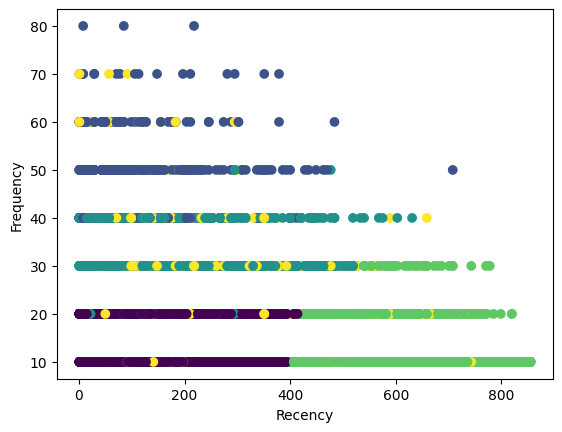

In [15]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(purchases_scaled)

# Add cluster labels to the original dataset
purchases['cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(purchases['recency'], purchases['frequency'], c=purchases['cluster'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

**Preprocessing** (Prepare the data to the modeling phase)

In [17]:
#Feature engineering
swg_df['discount']=swg_df['ratio'].apply(lambda x :1-x)
swg_df

country article  sales  regular_price  current_price     ratio  \
0      Germany  YN8639     28           5.95           3.95  0.663866   
1      Germany  YN8639     28           5.95           3.95  0.663866   
2      Germany  YN8639     28           5.95           3.95  0.663866   
3      Germany  YN8639     28           5.95           3.95  0.663866   
4      Germany  YN8639     28           5.95           3.95  0.663866   
...        ...     ...    ...            ...            ...       ...   
99995  Germany  PW6278    227          57.95          26.95  0.465056   
99996  Germany  PW6278    227          57.95          26.95  0.465056   
99997  Germany  PW6278    227          57.95          26.95  0.465056   
99998  Germany  PW6278    227          57.95          26.95  0.465056   
99999  Germany  PW6278    227          57.95          26.95  0.465056   

      retailweek  promo1  promo2  customer_id  ...                sizes  \
0     2016-03-27       0       0       1003.0  ...  xxs,xs,s,m,l,xl,xxl   
1     2016-03-27       0       0       1003.0  ...  xxs,xs,s,m,l,xl,xxl   
2     2016-03-27       0       0       1003.0  ...  xxs,xs,s,m,l,xl,xxl   
3     2016-03-27       0       0       1003.0  ...  xxs,xs,s,m,l,xl,xxl   
4     2016-03-27       0       0       1003.0  ...  xxs,xs,s,m,l,xl,xxl   
...          ...     ...     ...          ...  ...                  ...   
99995 2016-06-26       0       0       1489.0  ...  xxs,xs,s,m,l,xl,xxl   
99996 2016-06-26       0       0       1489.0  ...          xs,s,m,l,xl   
99997 2016-06-26       0       0       1489.0  ...  xxs,xs,s,m,l,xl,xxl   
99998 2016-06-26       0       0       1489.0  ...  xxs,xs,s,m,l,xl,xxl   
99999 2016-06-26       0       0       1489.0  ...  xxs,xs,s,m,l,xl,xxl   

       gender rgb_r_main_col  rgb_g_main_col rgb_b_main_col rgb_r_sec_col  \
0       women            205             104             57           255   
1       women            188             238            104           255   
2       women            205             173              0           255   
3        kids            205             140            149           164   
4       women            138              43            226           164   
...       ...            ...             ...            ...           ...   
99995   women             79             148            205           164   
99996  unisex            139              26             26           205   
99997   women            135             206            250           205   
99998   women            181             181            181           205   
99999     men            139             137            137           205   

      rgb_g_sec_col  rgb_b_sec_col  label  discount  
0               187            255      0  0.336134  
1               187            255      0  0.336134  
2               187            255      0  0.336134  
3               211            238      0  0.336134  
4               211            238      0  0.336134  
...             ...            ...    ...       ...  
99995           211            238      0  0.534944  
99996           155            155      0  0.534944  
99997           155            155      0  0.534944  
99998           155            155      0  0.534944  
99999           155            155      0  0.534944  

[100000 rows x 25 columns]

In [18]:
#a function to convert both lower and white spaces
def convert_lower_spaces(df):
  for column in (df.select_dtypes(include='object')).columns:
    df[column].str.lower()
    df[column].str.strip()

In [19]:
convert_lower_spaces(swg_df)

In [20]:
swg_df.drop(['retailweek','customer_id','ratio'], axis=1,inplace=True)
swg_df

country article  sales  regular_price  current_price  promo1  promo2  \
0      Germany  YN8639     28           5.95           3.95       0       0   
1      Germany  YN8639     28           5.95           3.95       0       0   
2      Germany  YN8639     28           5.95           3.95       0       0   
3      Germany  YN8639     28           5.95           3.95       0       0   
4      Germany  YN8639     28           5.95           3.95       0       0   
...        ...     ...    ...            ...            ...     ...     ...   
99995  Germany  PW6278    227          57.95          26.95       0       0   
99996  Germany  PW6278    227          57.95          26.95       0       0   
99997  Germany  PW6278    227          57.95          26.95       0       0   
99998  Germany  PW6278    227          57.95          26.95       0       0   
99999  Germany  PW6278    227          57.95          26.95       0       0   

      article.1          productgroup          category  ...  \
0        OC6355                 SHOES          TRAINING  ...   
1        AP5568                SHORTS          TRAINING  ...   
2        CB8861  HARDWARE ACCESSORIES              GOLF  ...   
3        LI3529                 SHOES           RUNNING  ...   
4        GG8661                 SHOES      RELAX CASUAL  ...   
...         ...                   ...               ...  ...   
99995    TX1463           SWEATSHIRTS          TRAINING  ...   
99996    PC6383                 SHOES  FOOTBALL GENERIC  ...   
99997    VT7698                 SHOES            INDOOR  ...   
99998    FG2965  HARDWARE ACCESSORIES           RUNNING  ...   
99999    AC7347                 SHOES  FOOTBALL GENERIC  ...   

                     sizes  gender rgb_r_main_col rgb_g_main_col  \
0      xxs,xs,s,m,l,xl,xxl   women            205            104   
1      xxs,xs,s,m,l,xl,xxl   women            188            238   
2      xxs,xs,s,m,l,xl,xxl   women            205            173   
3      xxs,xs,s,m,l,xl,xxl    kids            205            140   
4      xxs,xs,s,m,l,xl,xxl   women            138             43   
...                    ...     ...            ...            ...   
99995  xxs,xs,s,m,l,xl,xxl   women             79            148   
99996          xs,s,m,l,xl  unisex            139             26   
99997  xxs,xs,s,m,l,xl,xxl   women            135            206   
99998  xxs,xs,s,m,l,xl,xxl   women            181            181   
99999  xxs,xs,s,m,l,xl,xxl     men            139            137   

       rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  label  \
0                  57            255            187            255      0   
1                 104            255            187            255      0   
2                   0            255            187            255      0   
3                 149            164            211            238      0   
4                 226            164            211            238      0   
...               ...            ...            ...            ...    ...   
99995             205            164            211            238      0   
99996              26            205            155            155      0   
99997             250            205            155            155      0   
99998             181            205            155            155      0   
99999             137            205            155            155      0   

       discount  
0      0.336134  
1      0.336134  
2      0.336134  
3      0.336134  
4      0.336134  
...         ...  
99995  0.534944  
99996  0.534944  
99997  0.534944  
99998  0.534944  
99999  0.534944  

[100000 rows x 22 columns]

<Axes: >

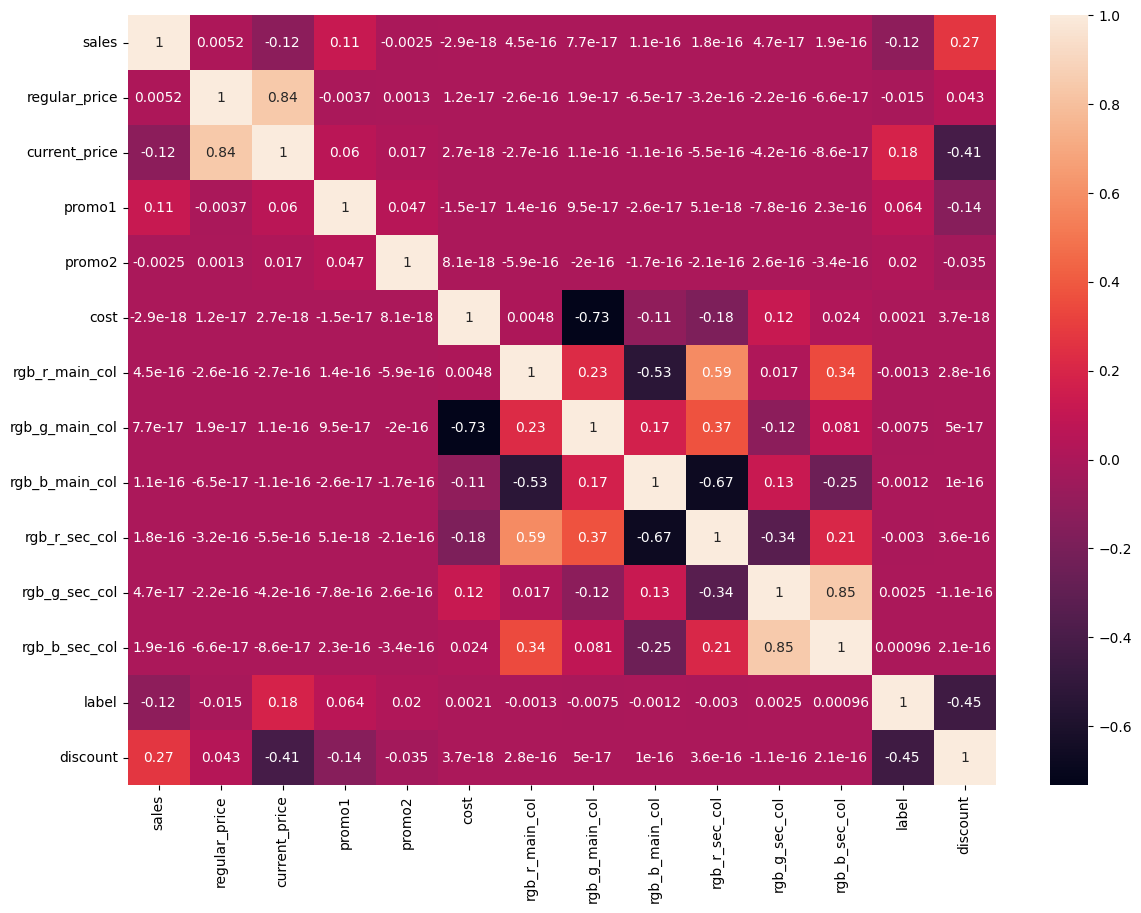

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap( swg_df.corr(),annot=True)

In [ ]:
swg_df.columns

Index(['country', 'sales', 'regular_price', 'current_price', 'promo1',
       'promo2', 'article.1', 'productgroup', 'category', 'cost', 'style',
       'sizes', 'gender', 'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col',
       'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col', 'label', 'discount'],
      dtype='object')

In [21]:
#Categorical Data Encoding*******************************************
sw_df=swg_df.copy()

categorical = [feature for feature in sw_df.columns if sw_df[feature].dtype == 'O']
categorical

['country',
 'article',
 'article.1',
 'productgroup',
 'category',
 'style',
 'sizes',
 'gender']

In [ ]:
check_inconsistentity(sw_df)  #check its content to decide type of encoding based on the content and the ordinality

"""
Binary classification problem so, the best encoding is target but to avoid overfitting use some other types
country: (one hot encoding)
article: (hashing encoding)
style: (label encoding)
sizes: (mapping)
productgroup , category and gender   (target encoding) 

"""

{'country': array(['Germany', 'Austria', 'France'], dtype=object)}
{'article.1': array(['OC6355', 'AP5568', 'CB8861', 'LI3529', 'GG8661', 'TX1463',
       'PC6383', 'VT7698', 'FG2965', 'AC7347'], dtype=object)}
{'productgroup': array(['SHOES', 'SHORTS', 'HARDWARE ACCESSORIES', 'SWEATSHIRTS'],
      dtype=object)}
{'category': array(['TRAINING', 'GOLF', 'RUNNING', 'RELAX CASUAL', 'FOOTBALL GENERIC',
       'INDOOR'], dtype=object)}
{'style': array(['slim', 'regular', 'wide'], dtype=object)}
{'sizes': array(['xxs,xs,s,m,l,xl,xxl', 'xs,s,m,l,xl'], dtype=object)}
{'gender': array(['women', 'kids', 'unisex', 'men'], dtype=object)}


'\nBinary classification problem so, the best encoding is target but to avoid overfitting use some other types\ncountry: (one hot encoding)\narticle: (hashing encoding)\nstyle: (label encoding)\nsizes: (mapping)\nproductgroup , category and gender   (target encoding) \n\n'

In [22]:
sw_df['sizes']=sw_df['sizes'].replace(['xxs,xs,s,m,l,xl,xxl','xs,s,m,l,xl'],['1','0'])

In [23]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.9 MB/s eta 0:00:00


In [24]:
###########to avoid the leakage from test data to the train data we split into train and test data firstly###############
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
trainn_data, testt_data, trainn_target, testt_target = train_test_split(sw_df.drop('label', axis=1), 
                                                                    sw_df['label'], 
                                                                    test_size=0.2, 
                                                                    random_state=42)



In [ ]:
#label encoding
from category_encoders.ordinal import OrdinalEncoder

# Perform categorical encoding on the training data
encoder =OrdinalEncoder (cols=['style'])
train_dataa = encoder.fit_transform(trainn_data)

# Use the same encoding scheme to encode the test data
test_dataa= encoder.transform(testt_data)

In [ ]:
train_dataa

country  sales  regular_price  current_price  promo1  promo2 article.1  \
75220  Austria     73          51.95          15.95       0       0    OC6355   
48955  Austria    281          44.95          27.95       0       0    TX1463   
44966  Germany     87           8.95           4.95       0       0    PC6383   
13568  Austria      9          90.95          90.95       0       0    FG2965   
92727  Germany     17          40.95          12.95       0       0    VT7698   
...        ...    ...            ...            ...     ...     ...       ...   
6265    France    154          62.95          31.95       0       0    TX1463   
54886  Austria    152          37.95          18.95       0       0    PC6383   
76820  Germany    175          98.95          48.95       0       0    OC6355   
860    Austria     13          22.95          20.95       0       0    OC6355   
15795  Germany     13          22.95          10.95       0       0    TX1463   

               productgroup          category   cost  style sizes  gender  \
75220                 SHOES          TRAINING  13.29      1     1   women   
48955           SWEATSHIRTS          TRAINING   4.20      2     1   women   
44966                 SHOES  FOOTBALL GENERIC   9.90      2     0  unisex   
13568  HARDWARE ACCESSORIES           RUNNING   1.29      1     1   women   
92727                 SHOES            INDOOR   5.20      2     1   women   
...                     ...               ...    ...    ...   ...     ...   
6265            SWEATSHIRTS          TRAINING   4.20      2     1   women   
54886                 SHOES  FOOTBALL GENERIC   9.90      2     0  unisex   
76820                 SHOES          TRAINING  13.29      1     1   women   
860                   SHOES          TRAINING  13.29      1     1   women   
15795           SWEATSHIRTS          TRAINING   4.20      2     1   women   

       rgb_r_main_col  rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col  \
75220             205             104              57            255   
48955              79             148             205            164   
44966             139              26              26            205   
13568             181             181             181            205   
92727             135             206             250            205   
...               ...             ...             ...            ...   
6265               79             148             205            164   
54886             139              26              26            205   
76820             205             104              57            255   
860               205             104              57            255   
15795              79             148             205            164   

       rgb_g_sec_col  rgb_b_sec_col  discount  
75220            187            255  0.692974  
48955            211            238  0.378198  
44966            155            155  0.446927  
13568            155            155  0.000000  
92727            155            155  0.683761  
...              ...            ...       ...  
6265             211            238  0.492454  
54886            155            155  0.500659  
76820            187            255  0.505306  
860              187            255  0.087146  
15795            211            238  0.522876  

[80000 rows x 20 columns]

In [ ]:
#one hot encoding

from category_encoders import OneHotEncoder

# Perform categorical encoding on the training data
encoder_country =OneHotEncoder (cols=['country'])
ttrain_data = encoder_country.fit_transform(train_dataa)

# Use the same encoding scheme to encode the test data
ttest_data= encoder_country.transform(test_dataa)

In [ ]:
ttrain_data

country_1  country_2  country_3  sales  regular_price  current_price  \
75220          1          0          0     73          51.95          15.95   
48955          1          0          0    281          44.95          27.95   
44966          0          1          0     87           8.95           4.95   
13568          1          0          0      9          90.95          90.95   
92727          0          1          0     17          40.95          12.95   
...          ...        ...        ...    ...            ...            ...   
6265           0          0          1    154          62.95          31.95   
54886          1          0          0    152          37.95          18.95   
76820          0          1          0    175          98.95          48.95   
860            1          0          0     13          22.95          20.95   
15795          0          1          0     13          22.95          10.95   

       promo1  promo2 article.1          productgroup  ... style  sizes  \
75220       0       0    OC6355                 SHOES  ...     1      1   
48955       0       0    TX1463           SWEATSHIRTS  ...     2      1   
44966       0       0    PC6383                 SHOES  ...     2      0   
13568       0       0    FG2965  HARDWARE ACCESSORIES  ...     1      1   
92727       0       0    VT7698                 SHOES  ...     2      1   
...       ...     ...       ...                   ...  ...   ...    ...   
6265        0       0    TX1463           SWEATSHIRTS  ...     2      1   
54886       0       0    PC6383                 SHOES  ...     2      0   
76820       0       0    OC6355                 SHOES  ...     1      1   
860         0       0    OC6355                 SHOES  ...     1      1   
15795       0       0    TX1463           SWEATSHIRTS  ...     2      1   

       gender rgb_r_main_col rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col  \
75220   women            205            104              57            255   
48955   women             79            148             205            164   
44966  unisex            139             26              26            205   
13568   women            181            181             181            205   
92727   women            135            206             250            205   
...       ...            ...            ...             ...            ...   
6265    women             79            148             205            164   
54886  unisex            139             26              26            205   
76820   women            205            104              57            255   
860     women            205            104              57            255   
15795   women             79            148             205            164   

       rgb_g_sec_col  rgb_b_sec_col  discount  
75220            187            255  0.692974  
48955            211            238  0.378198  
44966            155            155  0.446927  
13568            155            155  0.000000  
92727            155            155  0.683761  
...              ...            ...       ...  
6265             211            238  0.492454  
54886            155            155  0.500659  
76820            187            255  0.505306  
860              187            255  0.087146  
15795            211            238  0.522876  

[80000 rows x 22 columns]

In [ ]:
from category_encoders import TargetEncoder

# Perform categorical encoding on the training data

encoder_L = TargetEncoder(cols=['productgroup', 'category', 'gender'])
train_data_enc = encoder_L.fit_transform(ttrain_data, trainn_target)

# Use the same encoding scheme to encode the test data
test_data_en= encoder_L.transform(ttest_data)

In [ ]:
import category_encoders as ce

encoder_H = ce.HashingEncoder(n_components=5, cols=['article.1'])
train_data_encoded=encoder_H.fit_transform(train_data_enc)

test_data_encoded=encoder_H.transform(test_data_en)

In [ ]:
train_data_encoded

col_0  col_1  col_2  col_3  col_4  country_1  country_2  country_3  \
75220      0      0      1      0      0          1          0          0   
48955      1      0      0      0      0          1          0          0   
44966      0      0      0      0      1          0          1          0   
13568      0      0      1      0      0          1          0          0   
92727      0      0      0      0      1          0          1          0   
...      ...    ...    ...    ...    ...        ...        ...        ...   
6265       1      0      0      0      0          0          0          1   
54886      0      0      0      0      1          1          0          0   
76820      0      0      1      0      0          0          1          0   
860        0      0      1      0      0          1          0          0   
15795      1      0      0      0      0          0          1          0   

       sales  regular_price  ...  style  sizes    gender  rgb_r_main_col  \
75220     73          51.95  ...      1      1  0.139132             205   
48955    281          44.95  ...      2      1  0.139132              79   
44966     87           8.95  ...      2      0  0.143123             139   
13568      9          90.95  ...      1      1  0.139132             181   
92727     17          40.95  ...      2      1  0.139132             135   
...      ...            ...  ...    ...    ...       ...             ...   
6265     154          62.95  ...      2      1  0.139132              79   
54886    152          37.95  ...      2      0  0.143123             139   
76820    175          98.95  ...      1      1  0.139132             205   
860       13          22.95  ...      1      1  0.139132             205   
15795     13          22.95  ...      2      1  0.139132              79   

       rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col rgb_g_sec_col  \
75220             104              57            255           187   
48955             148             205            164           211   
44966              26              26            205           155   
13568             181             181            205           155   
92727             206             250            205           155   
...               ...             ...            ...           ...   
6265              148             205            164           211   
54886              26              26            205           155   
76820             104              57            255           187   
860               104              57            255           187   
15795             148             205            164           211   

       rgb_b_sec_col  discount  
75220            255  0.692974  
48955            238  0.378198  
44966            155  0.446927  
13568            155  0.000000  
92727            155  0.683761  
...              ...       ...  
6265             238  0.492454  
54886            155  0.500659  
76820            255  0.505306  
860              255  0.087146  
15795            238  0.522876  

[80000 rows x 26 columns]

In [ ]:
#remove the huge outliers of the sales by transform it into log scale
train_data_encoded['sales']=np.log(train_data_encoded['sales'])
test_data_encoded['sales']=np.log(test_data_encoded['sales'])

In [ ]:
#save the encoded data into a file csv
train_data_encoded.to_csv('train_encoded.csv')
test_data_encoded.to_csv('test_encoded.csv')

In [ ]:
'''
standardization to scale the features and improve the performance of the model
additionally, standardization the data can help to reduce the effect of outliers and minimize the impact of large
values on the model.

'''
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train_scale = SC.fit_transform(train_data_encoded)
x_test_scale = SC.transform(test_data_encoded)


**Modeling&Evaluation**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model
modell = RandomForestClassifier(n_estimators=100)

# Define the RFE
rfe = RFE(modell, n_features_to_select=12)

# Fit the RFE
rfe.fit(x_train_scale,trainn_target)

# Print the selected features
print(rfe.support_)

# Evaluate the model
scores = cross_val_score(modell, x_train_scale[:,rfe.support_], trainn_target, cv=12)
print(scores.mean())

[False False False False False  True  True False  True  True  True  True
 False False  True  True False False False  True  True  True False False
 False  True]
0.8447499860980546


In [ ]:

modell.fit(x_train_scale[:,rfe.support_], trainn_target)

# Predict on the test set
predictions = modell.predict(x_test_scale[:,rfe.support_])


In [ ]:
# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testt_target, predictions)
print('accuracy_of the RFE_randomforest is',format(accuracy))

accuracy_of the RFE_randomforest is 0.84255


In [ ]:
###########################Principle Component Analysis#############

from sklearn.decomposition import PCA
 
pca_train = PCA(n_components=6)
pca_test =PCA(n_components=6)
 
pca_features = pca_train.fit_transform(x_train_scale)
pca_test = pca_test.fit_transform(x_test_scale)
 
print('Shape before PCA: ', x_train_scale.shape)
print('Shape after PCA: ', pca_features.shape)

print('Shape before PCA: ', x_test_scale.shape)
print('Shape after PCA: ', pca_test.shape)
 
pca_train = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','pc4','pc5','pc6'])

pca_test = pd.DataFrame(
    data=pca_test, 
    columns=['PC1', 'PC2', 'PC3','pc4','pc5','pc6'])

Shape before PCA:  (80000, 26)
Shape after PCA:  (80000, 6)
Shape before PCA:  (20000, 26)
Shape after PCA:  (20000, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReggg = LogisticRegression()
logisticReggg.fit(pca_train,trainn_target )

LogisticRegression()

In [ ]:
predicted=logisticReggg.predict(pca_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
 #print classification report
print("Accuracy score is: ",accuracy_score(testt_target, predicted))
#print("Recall score is: ",recall_score(y_t#est, predicted))
#print("Precision score is: ",precision_score(y_test, predicted))
print("Confusion Matrix: \n",confusion_matrix(testt_target, predicted)) 
#imbalnced data problem : i'll try to handle more

Accuracy score is:  0.85625
Confusion Matrix: 
 [[17067   122]
 [ 2753    58]]


In [ ]:
'''
Adaboost technique to handle the imbalanced data and can be modified to give more weight to the minority clas

'''
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Create Adaboost classifier with 50 estimators
Ada = AdaBoostClassifier( n_estimators=50, random_state=42)

# Fit the classifier to the training data
Ada.fit(pca_train,trainn_target )

# Predict the classes of the test data
y_pred = Ada.predict(pca_test)

accuracy = accuracy_score(testt_target, y_pred)
print('accuracy_of the pca_Adaboost is',format(accuracy))

# Calculate confusion matrix
cm = confusion_matrix(testt_target, y_pred)
print(cm)


accuracy_of the pca_Adaboost is 0.85715
[[17107    82]
 [ 2775    36]]


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create Bagging classifier with Decision Tree base estimator
base_estimator =GaussianNB()
clff = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the classifier to the training data
clff.fit(pca_train, trainn_target)

# Predict the classes of the test data
y_predd = clff.predict(pca_test)

accuracy_kbagging = accuracy_score(testt_target, y_predd)
print('accuracy_of the pca_logisticbagging  is',format(accuracy_kbagging))

# Calculate confusion matrix
cm = confusion_matrix(testt_target, y_predd)
print(cm)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy_of the pca_logisticbagging  is 0.8491
[[16809   380]
 [ 2638   173]]


In [ ]:
import keras
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal', activation='relu',input_shape=(26,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Checking the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                1728      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scale, trainn_target, batch_size=8, epochs=5,
                    validation_data=(x_test_scale, testt_target))

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(8, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


10000/10000 [==============================] - 23s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8605 - val_loss: 0.0000e+00 - val_accuracy: 0.8594
Epoch 2/5
10000/10000 [==============================] - 24s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8610 - val_loss: 0.0000e+00 - val_accuracy: 0.8594
Epoch 3/5
10000/10000 [==============================] - 28s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8610 - val_loss: 0.0000e+00 - val_accuracy: 0.8594
Epoch 4/5
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8610 - val_loss: 0.0000e+00 - val_accuracy: 0.8594
Epoch 5/5
10000/10000 [==============================] - 30s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8610 - val_loss: 0.0000e+00 - val_accuracy: 0.8594


**modeling for cost prediction**

In [ ]:

train=pd.read_csv('/content/train_encoded.csv')
test=pd.read_csv('/content/test_encoded.csv')




In [ ]:
features_train=train.drop('cost', axis=1)
target_train=train['cost']

features_test=test.drop('cost', axis=1)
target_test=test['cost']

In [ ]:
scale=StandardScaler()
x_train_scaled = scale.fit_transform(features_train)
x_test_scaled = scale.transform(features_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Define the model
modell_cost= LinearRegression()

# Define the RFE
rfe_cost = RFE(modell_cost, n_features_to_select=8)

# Fit the RFE
rfe_cost.fit(x_train_scaled,target_train)

# Print the selected features
print(rfe.support_)

# Evaluate the model
scores = cross_val_score(modell_cost, x_train_scaled[:,rfe.support_], target_train, cv=8)
print(scores.mean())

[False False False False False  True  True False  True  True  True  True
 False False  True  True False False False  True  True  True False False
 False  True]
0.7941647246244197
